# Homework 2
# CS5787 Deep Learning 
# Spring 2023
# Naman Makkar (nbm49)
## Problem 1 - Linear Algebra Review \#1

Let  $
 {\bf{A}} = \left( {\begin{array}{*{20}r}
   1 & 2  \\
   5 & -2  \\
\end{array}} \right) $
and
$
 {\bf{B}} = \left( {\begin{array}{*{20}r}
   1 & 0 & 0  \\
   2 & 0 & 2  \\
\end{array}} \right) \\ 
$ 

### Part 1 (3 points)
Compute $Trace(\mathbf{A})$


**ANSWER:** 

$Trace(\mathbf{A}) = -1$.
Since the Trace of a matrix is defined as the sum of the elements on the main diagonal of the square matrix, We can calculate $Trace(\mathbf{A})$ as 1 - 2 = -1

### Part 2 (4 points)
Compute $Trace(\mathbf{BB}^T)$

**ANSWER:** 

$Trace(\mathbf{BB}^T) = 9$.
We can compute $\mathbf{BB}^T$ as $\left( {\begin{array}{*{20}r}
   1 & 0 & 0  \\
   2 & 0 & 2  \\
\end{array}} \right)$ $\left( {\begin{array}{*{20}r}
   1 & 2  \\
   0 & 0  \\
   0 & 2 \\
\end{array}} \right)$ = $\left( {\begin{array}{*{20}r}
   1 & 2  \\
   2 & 8  \\
\end{array}} \right)$ And the Trace of this Matrix can be calculated as 9.


## Problem 2 Linear Algebra Review \#2 (4 points)


Let  $\mathbf{A} \in \mathbb{R}^{n \times n}$, $\mathbf{D} \in \mathbb{R}^{n \times n}$, $\mathbf{b} \in \mathbb{R}^n$, and $\mathbf{x}^T \mathbf{(A + D)} = \mathbf{b}^T$.  Use the matrix inverse to solve for $\mathbf{x}$ and simplify. Assume that $ \det \mathbf{(A + D)}  \neq 0$.


**ANSWER**

$\mathbf{x} = \frac{\mathbf{adj(A + D)}^T}{\det \mathbf{(A + D)}} \mathbf{b} $


## Problem 3 - Linear Algebra Review \#3

Let matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ and matrix  $\mathbf{B} \in \mathbb{R}^{n \times m}$, where $n \neq m$.

### Part 1 (1 point)

If it is possible to compute the matrix product $\mathbf{AB}$, give the size of the matrix produced. Otherwise, write, Not possible.

**ANSWER**

The matrix $\mathbf{AB}$ would be an $\mathbb{R}^{n \times m}$ matrix

### Part 2 (1 point)

If it is possible to compute the matrix product $\mathbf{BA}$, give the size of the matrix produced. Otherwise, write, Not possible.

**ANSWER**


**Not Possible** since $\mathbf{B}$ is an $\mathbb{R}^{n \times m}$ matrix while A is an $\mathbb{R}^{n \times n}$ matrix. the product $\mathbf{BA}$ would only be possible if $\mathbf{A}$ had m rows, (as many rows as $\mathbf{B}$ has columns).




## Problem 4 - Regression

### Part 1 Load and Explore the Data (5 points)

Download the music year classification dataset \texttt{music-dataset.txt} at \url{https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd}. 
Each row is an instance. The first value is the target to be predicted (a year), and the remaining 90 values in a row are all input features. Split the dataset into train and test partitions by treating the first 463,714 examples as the train set and the remaining examples as the test set.  The first 12 dimensions are the average timbre and the remaining 78 are the timbre covariance in the song.


Write a function to load the dataset, e.g., \\ \texttt{trainYears, trainFeat, testYears, testFeat = loadMusicData(fname, addBias)} where \texttt{trainYears} has the years for the training data, \texttt{trainFeat} has the features, etc. \texttt{addBias} appends a 1 to your feature vectors.  Each of the returned variables should be NumPy arrays.

Write a function \texttt{mse = musicMSE(pred, gt)} where the inputs are the predicted year and the ground truth year from the dataset. The function computes the mean squared error (MSE) by rounding \texttt{pred} before computing the MSE.


Load the dataset and discuss its properties.  What is the range of the variables? How might you normalize them? What years are represented in the dataset?

What will the test mean squared error (MSE) be if your classifier always outputs the most common year in the dataset? 

### SOLUTION
**The Following coding Cells Solve Part 1**

The data can be normalized by using 'z-score' normalization on the features (independent variables) which involves subtracting the training mean from both the training and testing datasets and dividing them by the training standard deviation for both the training and test datasets.

Information about the dataset - The Range of the dependent variables of the dataset, namely the years  is 89. With the mean and standard deviation of the dependent variables rounded to the nearest integer being 1998 and 11 respectively.

Additionally, the MSE value obtained if the classifier outputs the most common year every time is 190.082


In [1]:
import numpy as np
import matplotlib as plt

def loadMusicData(fname: str = '/kaggle/input/dl-hw2/YearPredictionMSD.txt', addBias: bool= True):
    train_data_str = []
    test_data_str = []
    train_data_num = 463714
    feat_dims = 91 if addBias else 90
    with open(fname, 'r') as f:
        for idx,line in enumerate(f.readlines()):
            if idx < train_data_num:
                train_data_str.append(line.split('\n')[0])
            else:
                test_data_str.append(line.split('\n')[0])
                
    trainYears = [int(line.split(',')[0]) for line in train_data_str]
    testYears = [int(line.split(',')[0]) for line in test_data_str]
    trainFeat = [[1 for _ in range(feat_dims)] for _ in range(train_data_num)]
    
    for i,line in enumerate(train_data_str):
        for j,val in enumerate(line.split(',')[1:]):
            trainFeat[i][j] = float(val)
    trainFeat = np.array(trainFeat)
    testFeat = [[1 for _ in range(feat_dims)] for _ in range(len(test_data_str))]
    for i,line in enumerate(test_data_str):
        for j,val in enumerate(line.split(',')[1:]):
            testFeat[i][j] = float(val)
    testFeat = np.array(testFeat)
    trainYears = np.array(trainYears)
    testYears = np.array(testYears)
    return trainYears,trainFeat, testYears, testFeat
trainYears, trainFeat, testYears, testFeat = loadMusicData()

In [2]:
def musicMSE(pred, gt):
    pred = (np.rint(pred)).astype(int) # rounding
    return np.mean((pred - gt)**2)

In [3]:
test_pred_most_common = [np.bincount(trainYears).argmax() for _ in range(len(testYears))]
test_pred_most_common = np.array(test_pred_most_common)
print(f'The MSE if the classifier outputs the most common year every time {musicMSE(test_pred_most_common, testYears)}')

The MSE if the classifier outputs the most common year every time 190.08239236117836


In [3]:
# Information about the data
print(round(trainYears.mean()))

1998


In [4]:
years_all = np.concatenate((trainYears, testYears), axis=0)
years_all.shape

(515345,)

In [5]:
import matplotlib.pyplot as plt
y = np.bincount(years_all)
y.shape

(2012,)

In [6]:
years_all.max()

2011

In [7]:
np.bincount(years_all).argsort()[-100:]

array([ 643,  642,  641,  640,  639,  638,  637,  636,  635,  646,  603,
       2011, 1924, 1922, 1933, 1925, 1932, 1943, 1944, 1926, 1938, 1942,
       1935, 1936, 1937, 1934, 1946, 1945, 1941, 1931, 1939, 1930, 1927,
       1948, 1940, 1928, 1947, 1949, 1951, 1952, 1950, 1929, 1954, 1953,
       1955, 1960, 1956, 1961, 1958, 1959, 1957, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1971, 1976, 1974, 1969, 1972, 1970, 1975, 1977,
       1973, 1978, 1980, 1979, 1981, 1984, 1983, 1985, 1982, 1986, 1987,
       1988, 1989, 1990, 1991, 2010, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2009, 2008, 2005, 2006,
       2007])

In [8]:
print('We have data for the following years in the entire dataset')
np.unique(years_all)

We have data for the following years in the entire dataset


array([1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011])

In [9]:
np.max(years_all) - np.min(years_all)

89

In [10]:
counts, years = np.histogram(years_all, bins=tuple(np.insert(np.unique(years_all), 0, 0)))
counts

array([    0,     6,     5,     7,    19,    42,    52,    93,    40,
          35,    11,     6,    29,    24,    25,    28,    19,    35,
          52,    32,    24,    14,    15,    30,    29,    57,    43,
          60,    83,    74,    77,   133,   123,   275,   565,   597,
         583,   592,   424,   571,   605,   902,   945,  1120,  1377,
        1718,  1867,  2210,  2349,  2131,  2288,  2596,  2184,  2482,
        2179,  2502,  2926,  3108,  3101,  3162,  3597,  3386,  3368,
        3578,  4219,  5122,  5611,  6670,  7256,  8647,  9543, 10525,
       12121, 13257, 14130, 15182, 15814, 18238, 19285, 21590, 23451,
       27382, 29607, 34952, 37534, 39404, 34760, 31038,  9397])

In [11]:
years

array([   0, 1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011])

In [12]:
counts.shape

(89,)

In [13]:
years.shape

(90,)

In [14]:
years_all.std()

10.931035748764902

In [15]:
testYears.mean()

1998.495922992001

In [16]:
trainYears.mean()

1998.386076331532

In [17]:
print(f'Mean of Training Dataset Years: {round(trainYears.mean())}')
print(f'Mean of Test Dataset Years: {round(testYears.mean())}')
print(f'Standard Deviation of Training Dataset Years: {round(trainYears.std())}')
print(f'Standard Deviation of Test Dataset Years: {round(testYears.std())}')
print(f'Mean of the Entire Dataset Years: {round(years_all.mean())}')
print(f'Standard Deviation of the Entire Dataset Years: {round(years_all.std())}')

Mean of Training Dataset Years: 1998
Mean of Test Dataset Years: 1998
Standard Deviation of Training Dataset Years: 11
Standard Deviation of Test Dataset Years: 11
Mean of the Entire Dataset Years: 1998
Standard Deviation of the Entire Dataset Years: 11


### Part 2 - Classification? (5 points)

This problem could have been posed as a classification problem by treating each year as a category. What would be the problems with this approach? Support your argument by analyzing a bar chart with the year as the x-axis and the number of examples for that year as the y-axis.

## SOLUTION

It can be observed from the bar and histogram plots in the figures below that the dataset is heavily skewed towards the 2000s and has a probability distribution with a mean of 1998 and standard deviation of 11. It is therefore not ideal to carry out classification with the years being the categorical dependent variable and each year being treated as a category since there is not enough data for music before the 2000s and the classifier would provide us with inaccurate predictions, classifying majority of the datapoints in the test set in the 2000s.

In [18]:
unique_years_all = list(np.unique(years_all))
unique_years_training = list(np.unique(trainYears))
unique_years_test = list(np.unique(testYears))
counts_all = []
counts_train = []
counts_test = []
for yr in unique_years_all:
    counts_all.append(np.count_nonzero(years_all == yr))
for yr in unique_years_training:
    counts_train.append(np.count_nonzero(trainYears == yr))
for yr in unique_years_test:
    counts_test.append(np.count_nonzero(testYears == yr))
counts_all = np.array(counts_all)
counts_train = np.array(counts_train)
counts_test = np.array(counts_test)

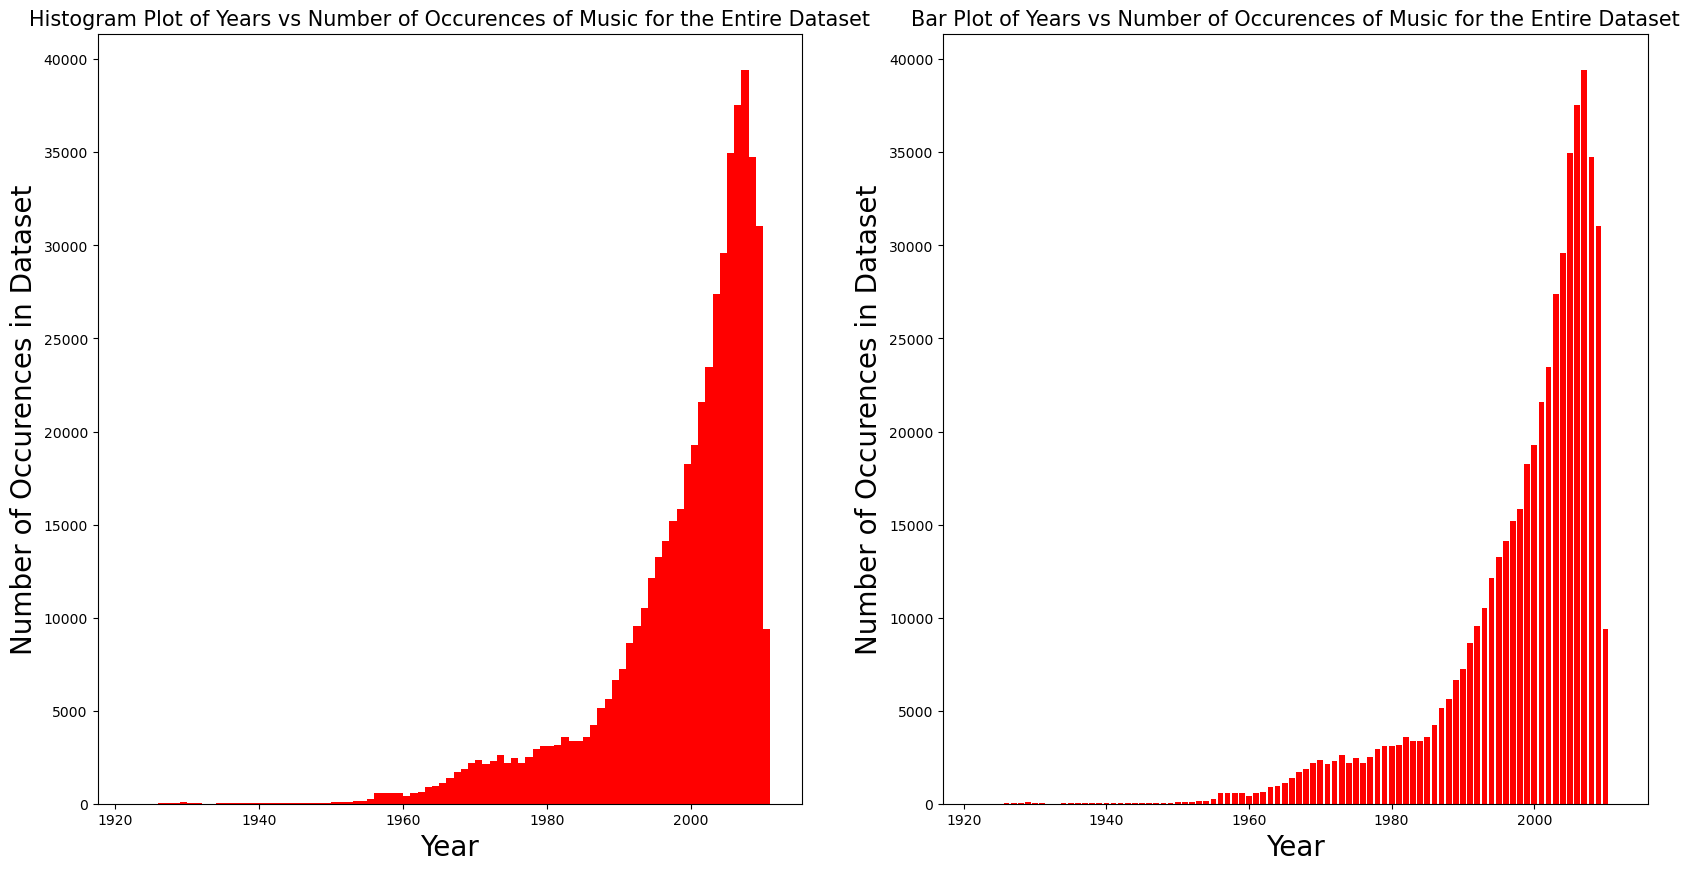

In [19]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.hist(years_all, bins=np.unique(years_all), color='red')
plt.title('Histogram Plot of Years vs Number of Occurences of Music for the Entire Dataset', size=15)
plt.xlabel('Year', size=20)
plt.ylabel('Number of Occurences in Dataset', size=20)

plt.subplot(1, 2, 2)
plt.bar(np.unique(years_all), counts_all, color='red')
plt.title('Bar Plot of Years vs Number of Occurences of Music for the Entire Dataset', size=15)
plt.xlabel('Year', size=20)
plt.ylabel('Number of Occurences in Dataset', size=20)
fig.savefig('hist_years_vs_occurences.png')
plt.show()

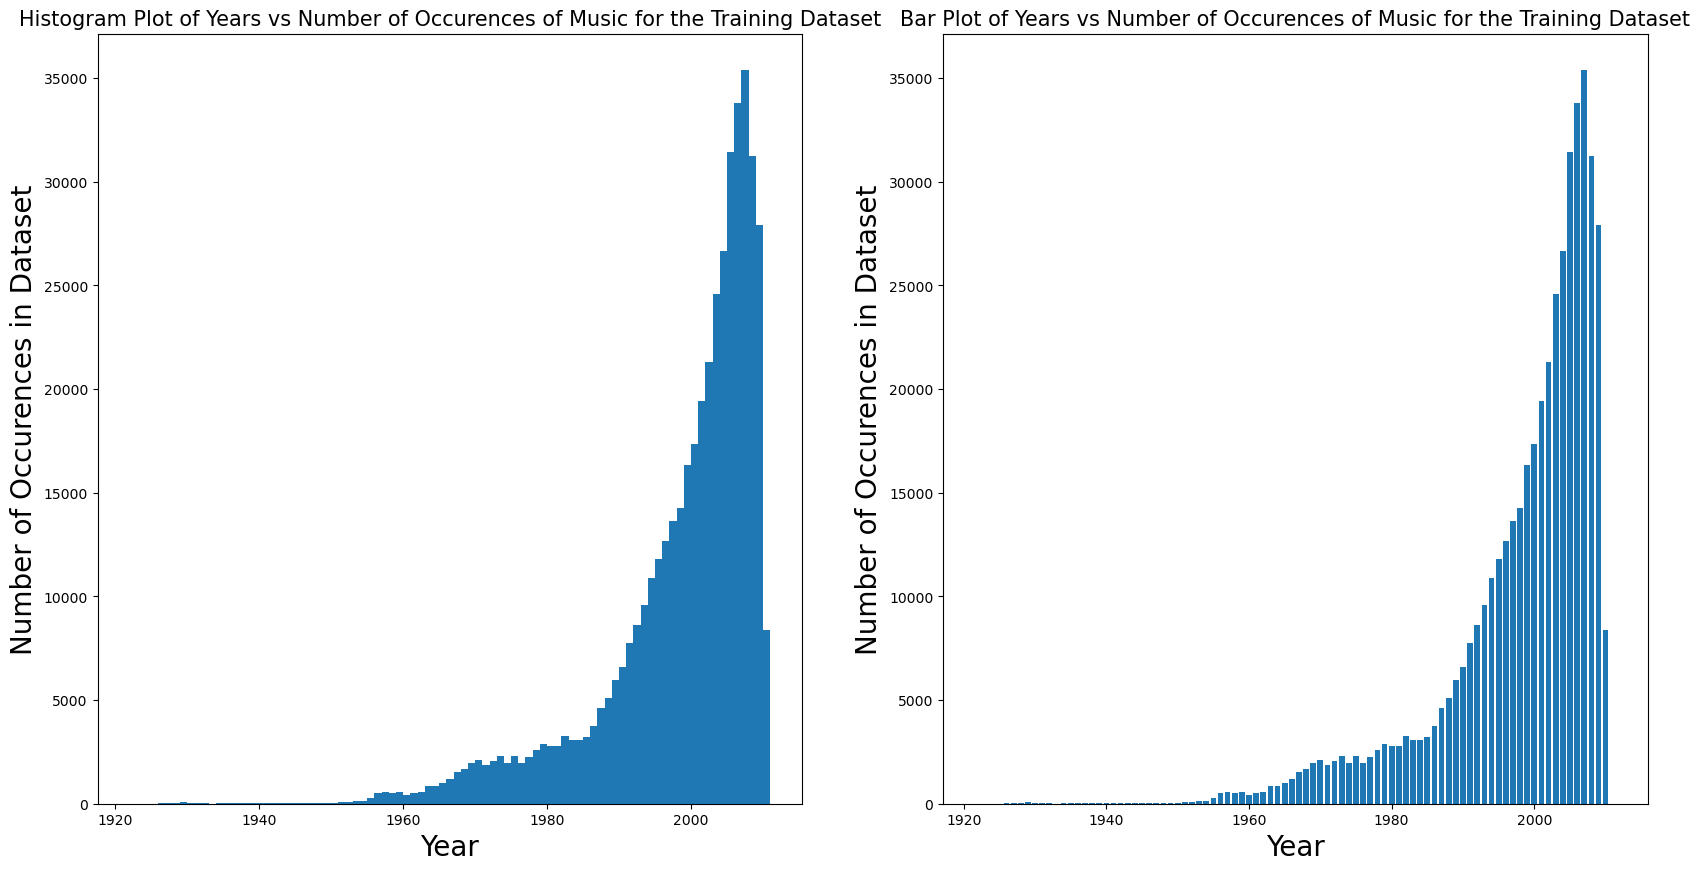

In [20]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.hist(trainYears, bins=np.unique(trainYears))
plt.title('Histogram Plot of Years vs Number of Occurences of Music for the Training Dataset', size=15)
plt.xlabel('Year', size=20)
plt.ylabel('Number of Occurences in Dataset', size=20)

plt.subplot(1, 2, 2)
plt.bar(np.unique(trainYears), counts_train)
plt.title('Bar Plot of Years vs Number of Occurences of Music for the Training Dataset', size=15)
plt.xlabel('Year',size=20)
plt.ylabel('Number of Occurences in Dataset', size=20)
fig.savefig('hist_years_vs_occurences_train.png')
plt.show()

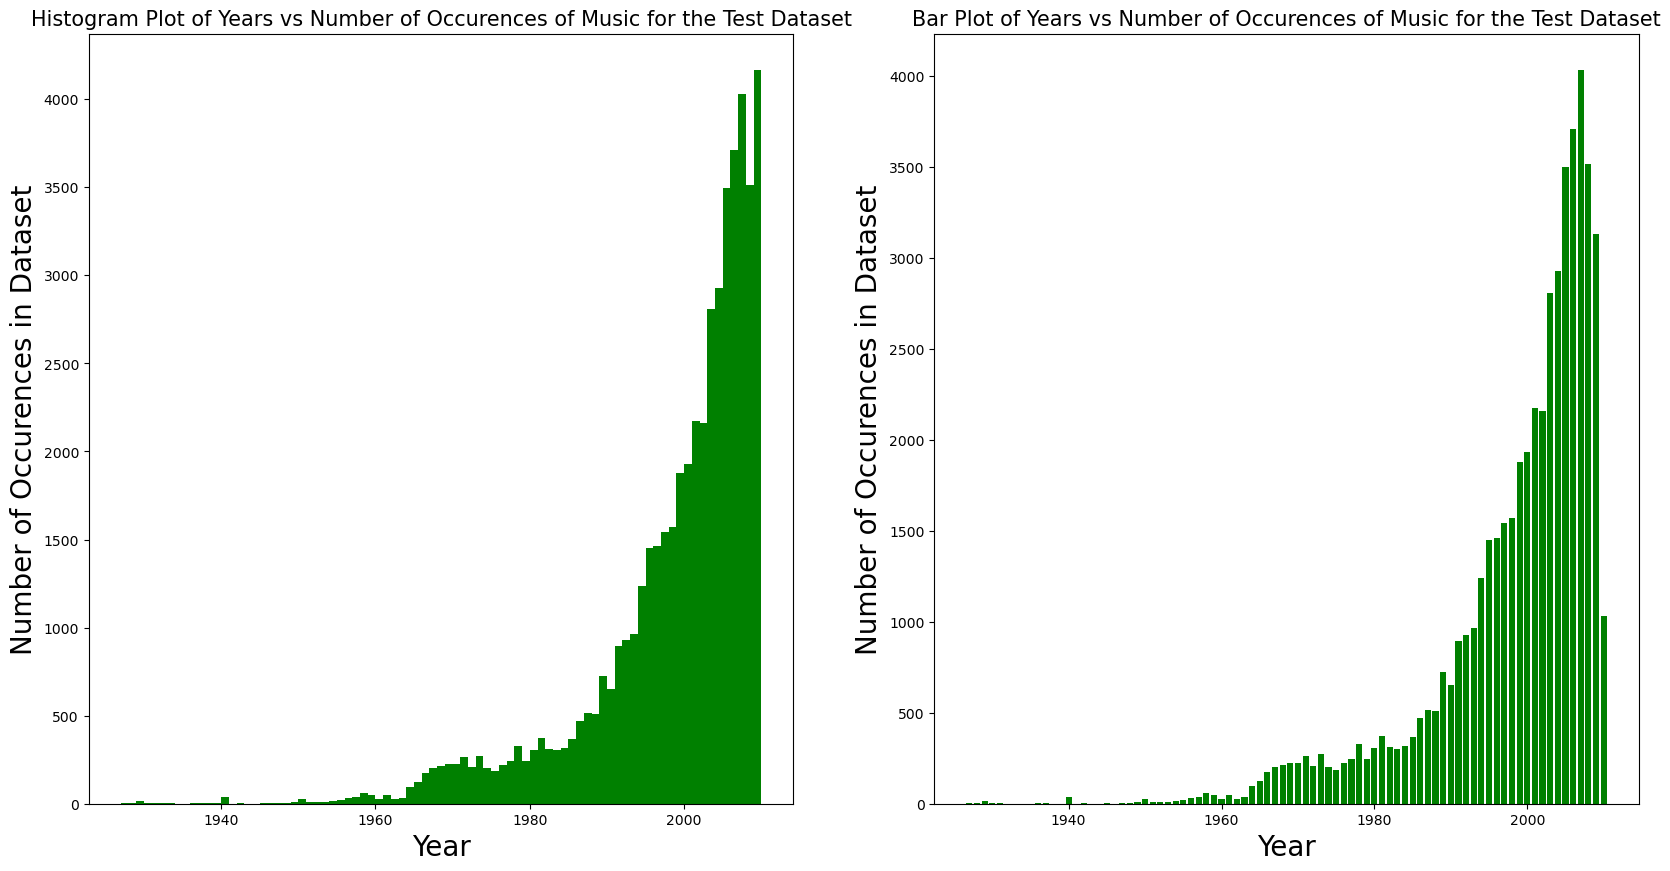

In [21]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.hist(testYears, bins=np.unique(testYears), color='green')
plt.title('Histogram Plot of Years vs Number of Occurences of Music for the Test Dataset', size=15)
plt.xlabel('Year', size=20)
plt.ylabel('Number of Occurences in Dataset', size=20)

plt.subplot(1, 2, 2)
plt.bar(np.unique(testYears), counts_test, color='green')
plt.title('Bar Plot of Years vs Number of Occurences of Music for the Test Dataset', size=15)
plt.xlabel('Year',size=20)
plt.ylabel('Number of Occurences in Dataset', size=20)
fig.savefig('hist_years_vs_occurences_test.png')
plt.show()

## Part 3 - Implementing Ridge (Tikhonov) Regression (6 points)

Implement stochastic gradient descent with mini-batches to minimize the loss and evaluate the train and test MSE. 

Tune the learning rate and weight decay factor. Subsequently, show the train and test loss as a function of epochs, where the number of epochs should be chosen to ensure the train loss is minimized. 

This problem can be solved directly using the pseudoinverse. Let $\mathbf{X}=\left[\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N  \right]$ and $\mathbf{y}=\left[y_1, y_2, \ldots, y_N  \right]^T$, then the pseudoinverse solution is given by
\[
$\mathbf{w} = \left(\mathbf{X}\mathbf{X}^T + \alpha \textbf{I} \right)^{-1}\mathbf{X}\textbf{y}.$
\]

Compare both solutions.

## SOLUTION

In [22]:
# First Carry out z-score normalization
normalized_train_feats = (trainFeat - trainFeat.mean())/trainFeat.std()
normalized_test_feats = (testFeat - trainFeat.mean())/trainFeat.std()

In [23]:
# Making sure the last column is comprised of ones for the bias term for the training set
normalized_train_feats[:,-1]=np.ones(normalized_train_feats[:,-1].shape)

In [24]:
# Same for the test set, ensuring that the final column is comprised of ones
normalized_test_feats[:,-1] = np.ones(normalized_test_feats[:,-1].shape)

In [25]:
normalized_test_feats

array([[-0.12775472, -0.2140603 , -0.12036492, ..., -0.31234035,
        -0.2272389 ,  1.        ],
       [-0.1374124 , -0.28819796, -0.16443825, ..., -0.15525926,
        -0.21314761,  1.        ],
       [-0.12309188, -0.23306104, -0.1403598 , ..., -0.36382124,
        -0.23766447,  1.        ],
       ...,
       [-0.13803278, -0.20229366, -0.30397164, ..., -0.12054873,
        -0.24336088,  1.        ],
       [-0.13993736, -0.16325517, -0.23397252, ..., -0.19799226,
        -0.14867882,  1.        ],
       [-0.12471642, -0.11035009, -0.17510819, ..., -0.16330991,
        -0.20325162,  1.        ]])

In [26]:
normalized_train_feats

array([[-0.12850367, -0.18485138, -0.08272099, ..., -0.28169433,
        -0.22286428,  1.        ],
       [-0.1309011 , -0.19087126, -0.08816472, ..., -0.11169982,
        -0.17406673,  1.        ],
       [-0.12649778, -0.16429942, -0.116877  , ..., -0.14883399,
        -0.22865634,  1.        ],
       ...,
       [-0.14297778, -0.20432651, -0.27485411, ..., -0.0158077 ,
        -0.23971839,  1.        ],
       [-0.1395218 , -0.22412682, -0.15181267, ..., -0.18295494,
        -0.23547503,  1.        ],
       [-0.1385103 , -0.19934487, -0.23863754, ..., -0.01634918,
        -0.19407826,  1.        ]])

## IMPLEMENTATION OF TIKHONOV REGRESSION, RIDGE REGRESSION, LASSO REGRESSION AND COUNT REGRESSION

In [27]:
X_T_X = normalized_train_feats.T @ normalized_train_feats
W = np.linalg.inv(X_T_X + 1e-6*np.identity(X_T_X.shape[0])) @ np.dot(normalized_train_feats.T,trainYears)
W

array([ 4.41344618e+02, -2.82036763e+01, -2.19567603e+01,  1.77330807e+00,
       -7.50554177e+00, -1.11923654e+02, -3.15810438e+00, -5.14421643e+01,
       -3.42178541e+01,  1.14972975e+01, -8.30715042e+01, -1.01228578e+00,
        2.38252253e+01,  1.80644207e-01, -2.19464995e-01,  3.09441750e-01,
        2.20402295e-01,  7.32505525e-01,  9.99930025e-01,  1.11767775e+00,
        3.68587332e-01, -2.78664440e-01,  3.85350455e+00,  1.38134164e+00,
       -1.81190101e+00,  1.90333324e-02,  8.07093086e-01,  2.40231166e-01,
        4.62746248e-01, -1.20478903e-01, -6.27572580e-01, -7.11845695e-01,
       -2.78299228e+00,  1.30063871e+00,  8.22733284e-01, -2.63080958e+00,
       -1.24961204e-01,  3.35720750e-01,  7.10221033e-01, -8.71861370e-01,
       -1.05369108e+00, -4.09711611e-01, -7.64819225e-01, -1.22331862e+00,
       -1.63596370e+00,  3.37343416e+00,  2.41362846e-01, -1.03183082e+00,
        1.41369320e-01,  1.04030841e+00,  5.25715199e-03, -8.84841168e-01,
        9.41515704e-01,  

In [28]:
y_hat = np.dot(normalized_train_feats, W)
print(f'Train Loss for Pseudo Inverse: {musicMSE(y_hat,trainYears)}')

Train Loss for Pseudo Inverse: 91.3457519074257


In [29]:
y_hat_test = np.dot(normalized_test_feats, W)
print(f'Test Loss for Pseudo Inverse: {musicMSE(y_hat_test, testYears)}')

Test Loss for Pseudo Inverse: 90.5480815788964


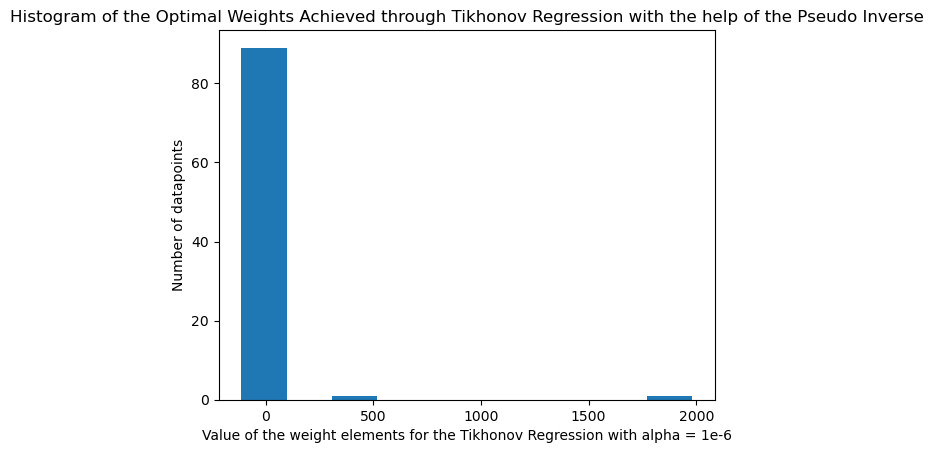

In [30]:
import matplotlib.pyplot as plt
plt.title('Histogram of the Optimal Weights Achieved through Tikhonov Regression with the help of the Pseudo Inverse')
plt.hist(W)
plt.ylabel('Number of datapoints')
plt.xlabel('Value of the weight elements for the Tikhonov Regression with alpha = 1e-6')
plt.show()

In [31]:
# Implementation of SGD for L2 Loss and Count Loss for L2, L1 weight decay
def mini_batch_sgd(X, y, X_test, y_test, epochs=5000, lr=1e-2, batch_size=256, alpha=1e-6, loss_type='L2', weight_decay_type='L2'):
    W = np.zeros(X.shape[1])
    loss = []
    test_losses = []
    for ep in range(epochs):
        for mini_batch in range(0, X.shape[0], batch_size):
            X_mini_batch = X[mini_batch:mini_batch+batch_size]
            y_mini_batch = y[mini_batch:mini_batch+batch_size]
            
            y_hat = np.dot(X_mini_batch, W) # Bias is taken care of due to the column of 1s appended in the final column of X
            #y_hat = np.array(y_hat, dtype=np.float128)
            if (loss_type=='L2'):
                if (weight_decay_type == None):
                    grad_w = 2*np.mean((y_hat - y_mini_batch)[:, None]*X_mini_batch, axis=0)
                    W -= grad_w*lr
                if (weight_decay_type == 'L2'):
                    grad_w = 2*np.mean((y_hat - y_mini_batch)[:, None]*X_mini_batch, axis=0) + 2*alpha*W
                    W -= grad_w*lr
                if (weight_decay_type == 'L1'):
                    grad_w = 2*np.mean((y_hat - y_mini_batch)[:, None]*X_mini_batch, axis=0) + alpha*np.sign(W)
                    W -= grad_w*lr
                    
            if(loss_type=='count'): #Implementing Count Regression
                if(weight_decay_type==None):
                    y_pred = np.exp(y_hat - np.max(y_hat)) # Cool Trick to avoid overflows by ensuring that the largest value in the exp is removed
                    grad_w = np.mean(np.dot(X_mini_batch.T, (y_pred - y_mini_batch)))
                    #print(grad_w)
                    W -= grad_w*lr
                if(weight_decay_type=='L2'):
                    y_pred = np.exp(y_hat -  np.max(y_hat))
                    grad_w = np.mean(X_mini_batch.T @ (y_pred - y_mini_batch)) + 2*alpha*W
                    W -= grad_w*lr
                else:
                    y_pred = np.exp(y_hat - np.max(y_hat))
                    grad_w = np.mean(X_mini_batch.T @ (y_pred - y_mini_batch)) + alpha*np.sign(W)
                    W -= grad_w*lr  
                    
        y_hat_full = np.dot(X, W)
        y_hat_test = np.dot(X_test,W)
        
        
        if (loss_type=='L2' and weight_decay_type == None):
            loss_full = musicMSE(y_hat_full, y)
            loss_test = musicMSE(y_hat_test, y_test)
        if (loss_type=='L2' and weight_decay_type == 'L2'):
            loss_full = musicMSE(y_hat_full, y) + alpha*np.linalg.norm(W)**2
            loss_test = musicMSE(y_hat_test, y_test) + alpha*np.linalg.norm(W)**2
        if(loss_type=='L2' and weight_decay_type == 'L1'):
            loss_full = musicMSE(y_hat_full, y) + alpha*np.sum(np.abs(W))
            loss_test = musicMSE(y_hat_test, y_test) + alpha*np.sum(np.abs(W))
        if(loss_type=='count' and weight_decay_type == None):
            #y_hat_full = np.array(y_hat_full, dtype=np.float128)
            y_pred_full = np.exp(y_hat_full - np.max(y_hat_full))
            loss_full = np.mean(y_pred_full - y * np.log(y_pred_full + 1e-8))
            y_pred_test = np.exp(y_hat_test - np.max(y_hat_test))
            loss_test = np.mean(y_pred_test - y_test * np.log(y_pred_test + 1e-8))
        if(loss_type=='count' and weight_decay_type == 'L2'):
            #y_hat_full = np.array(y_hat_full, dtype=np.float128)
            y_pred_full = np.exp(y_hat_full - np.max(y_hat_full))
            loss_full = np.mean(y_pred_full - y * np.log(y_pred_full + 1e-8)) + alpha*np.linalg.norm(W)**2
            y_pred_test = np.exp(y_hat_test - np.max(y_hat_test))
            loss_test = np.mean(y_pred_test - y_test*np.log(y_pred_test + 1e-8)) + alpha*np.linalg.norm(W)**2
        if(loss_type=='count' and weight_decay_type == 'L1'):
            #y_hat_full = np.array(y_hat_full, dtype=np.float128)
            y_pred_full = np.exp(y_hat_full - np.max(y_hat_full))
            loss_full = np.mean(y_pred_full - y * np.log(y_pred_full + 1e-8)) + alpha*np.sum(np.abs(W))
            y_pred_test = np.exp(y_hat_test - np.max(y_hat_test))
            loss_test = np.mean(y_pred_test - y_test*np.log(y_pred_test + 1e-8)) + alpha*np.sum(np.abs(W))
            
        loss.append(loss_full)
        test_losses.append(loss_test)
            
        if(ep % 100 == 0):
            #print(f'Loss for epoch:{ep+1} is {loss_full}')  
            print("Epoch {}/{} - TRAIN - loss: {:.4f}".format(ep+1, epochs, loss_full))
            print("Epoch {}/{} - EVAL - loss: {:.4f}".format(ep+1, epochs, loss_test))
            print('\n')
    return W, loss, test_losses

In [33]:
W_sgd_L2loss_nodecay, loss_ridge_train_nodecay, loss_ridge_test_nodecay = mini_batch_sgd(X=normalized_train_feats, y=trainYears, X_test=normalized_test_feats, y_test=testYears, lr=1e-2, weight_decay_type=None)

Epoch 1/5000 - TRAIN - loss: 4351.0476
Epoch 1/5000 - EVAL - loss: 4263.3969


Epoch 101/5000 - TRAIN - loss: 174.1530
Epoch 101/5000 - EVAL - loss: 172.2452


Epoch 201/5000 - TRAIN - loss: 142.5113
Epoch 201/5000 - EVAL - loss: 142.6179


Epoch 301/5000 - TRAIN - loss: 132.0716
Epoch 301/5000 - EVAL - loss: 132.7888


Epoch 401/5000 - TRAIN - loss: 126.4101
Epoch 401/5000 - EVAL - loss: 127.3287


Epoch 501/5000 - TRAIN - loss: 122.5954
Epoch 501/5000 - EVAL - loss: 123.5751


Epoch 601/5000 - TRAIN - loss: 119.8004
Epoch 601/5000 - EVAL - loss: 120.8039


Epoch 701/5000 - TRAIN - loss: 117.7596
Epoch 701/5000 - EVAL - loss: 118.7556


Epoch 801/5000 - TRAIN - loss: 116.2052
Epoch 801/5000 - EVAL - loss: 117.1588


Epoch 901/5000 - TRAIN - loss: 115.0064
Epoch 901/5000 - EVAL - loss: 115.9239


Epoch 1001/5000 - TRAIN - loss: 114.0864
Epoch 1001/5000 - EVAL - loss: 114.9934


Epoch 1101/5000 - TRAIN - loss: 113.3816
Epoch 1101/5000 - EVAL - loss: 114.2540


Epoch 1201/5000 - TRAIN - 

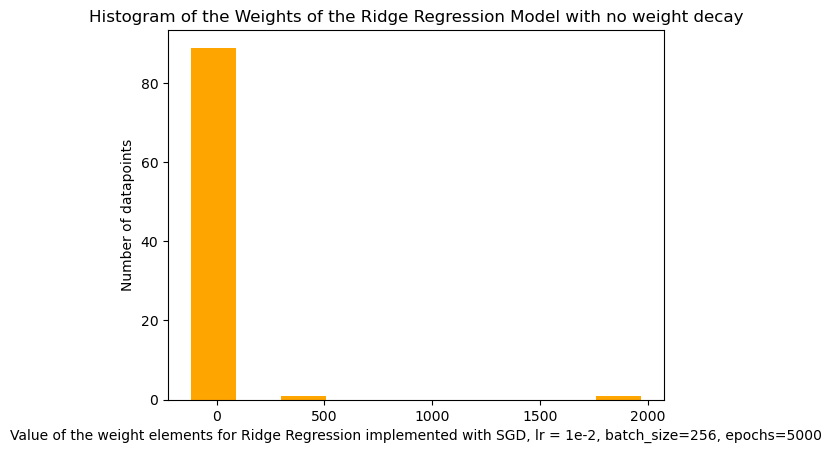

In [35]:
plt.title('Histogram of the Weights of the Ridge Regression Model with no weight decay')
plt.hist(W_sgd_L2loss_nodecay, color='orange')
plt.ylabel('Number of datapoints')
plt.xlabel('Value of the weight elements for Ridge Regression implemented with SGD, lr = 1e-2, batch_size=256, epochs=5000')
plt.show()

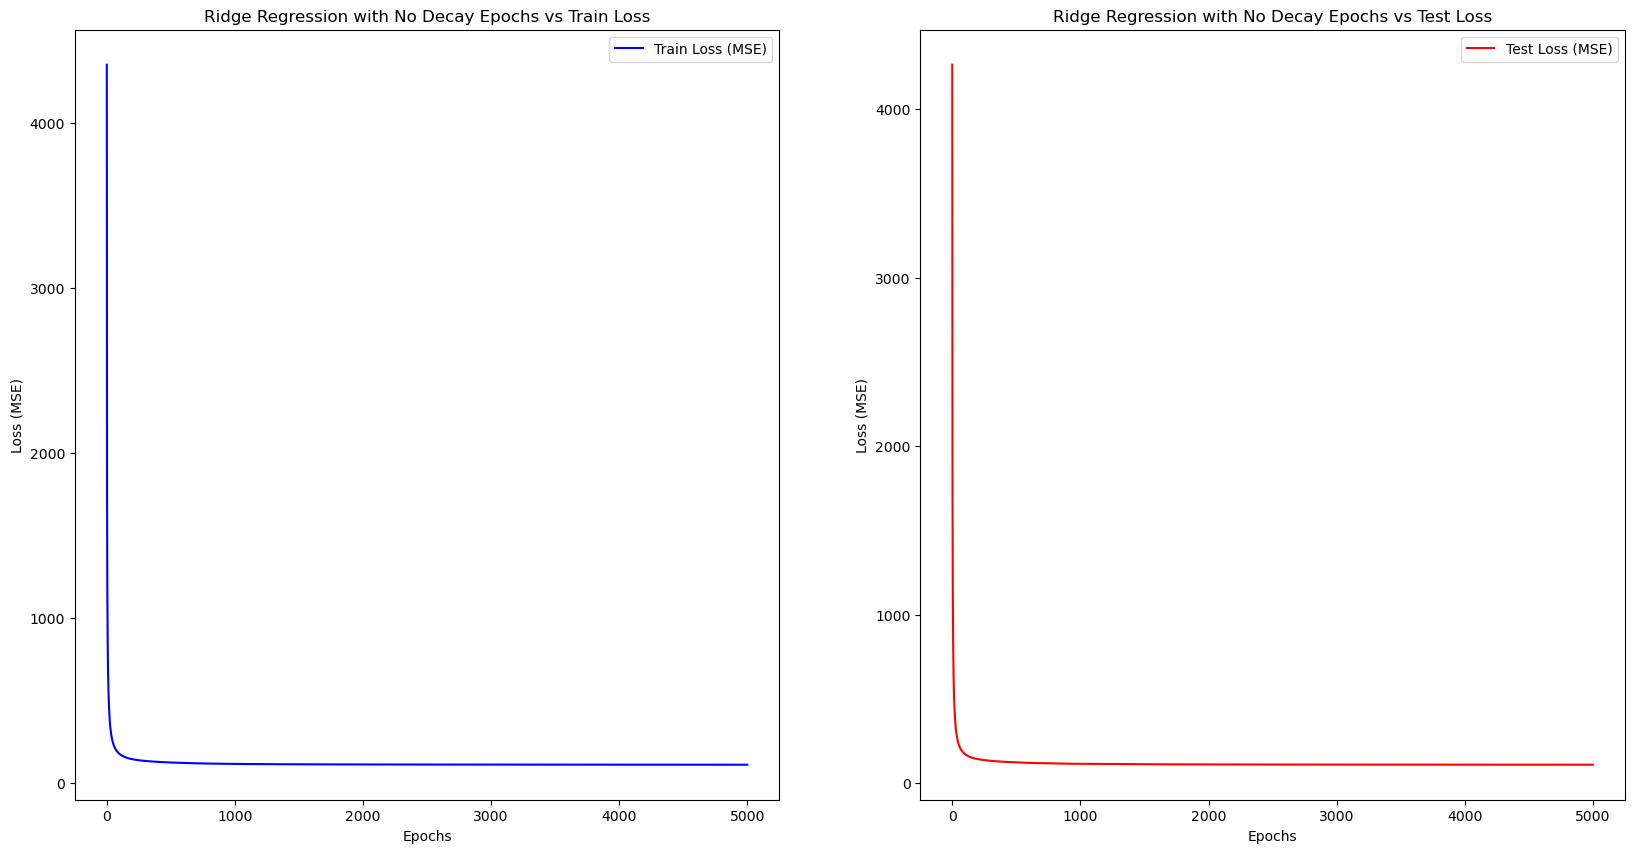

In [34]:
epochs_regression = [i for i in range(5000)]
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs_regression, loss_ridge_train_nodecay, color='b', label='Train Loss (MSE)')
plt.title('Ridge Regression with No Decay Epochs vs Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_regression, loss_ridge_test_nodecay, color='r', label='Test Loss (MSE)')
plt.title('Ridge Regression with No Decay Epochs vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
fig.savefig('ridge_regression_no_decay_epochs_vs_loss.png')
plt.show()

In [33]:
W_sgd_L2loss_L2decay, loss_train, loss_test = mini_batch_sgd(X=normalized_train_feats, y=trainYears, X_test=normalized_test_feats, y_test=testYears, weight_decay_type='L2')

Epoch 1/5000 - TRAIN - loss: 4352.2660

Epoch 1/5000 - EVAL - loss: 4264.6375





Epoch 101/5000 - TRAIN - loss: 177.1073

Epoch 101/5000 - EVAL - loss: 175.1928





Epoch 201/5000 - TRAIN - loss: 145.7758

Epoch 201/5000 - EVAL - loss: 145.8865





Epoch 301/5000 - TRAIN - loss: 135.5149

Epoch 301/5000 - EVAL - loss: 136.1974





Epoch 401/5000 - TRAIN - loss: 129.9697

Epoch 401/5000 - EVAL - loss: 130.8734





Epoch 501/5000 - TRAIN - loss: 126.2532

Epoch 501/5000 - EVAL - loss: 127.2044





Epoch 601/5000 - TRAIN - loss: 123.5543

Epoch 601/5000 - EVAL - loss: 124.5388





Epoch 701/5000 - TRAIN - loss: 121.5788

Epoch 701/5000 - EVAL - loss: 122.5752





Epoch 801/5000 - TRAIN - loss: 120.0980

Epoch 801/5000 - EVAL - loss: 121.0454





Epoch 901/5000 - TRAIN - loss: 118.9523

Epoch 901/5000 - EVAL - loss: 119.8691





Epoch 1001/5000 - TRAIN - loss: 118.0959

Epoch 1001/5000 - EVAL - loss: 118.9246





Epoch 1101/5000 - TRAIN - loss: 117.4138

Epoch 1101/5000 - EVAL 

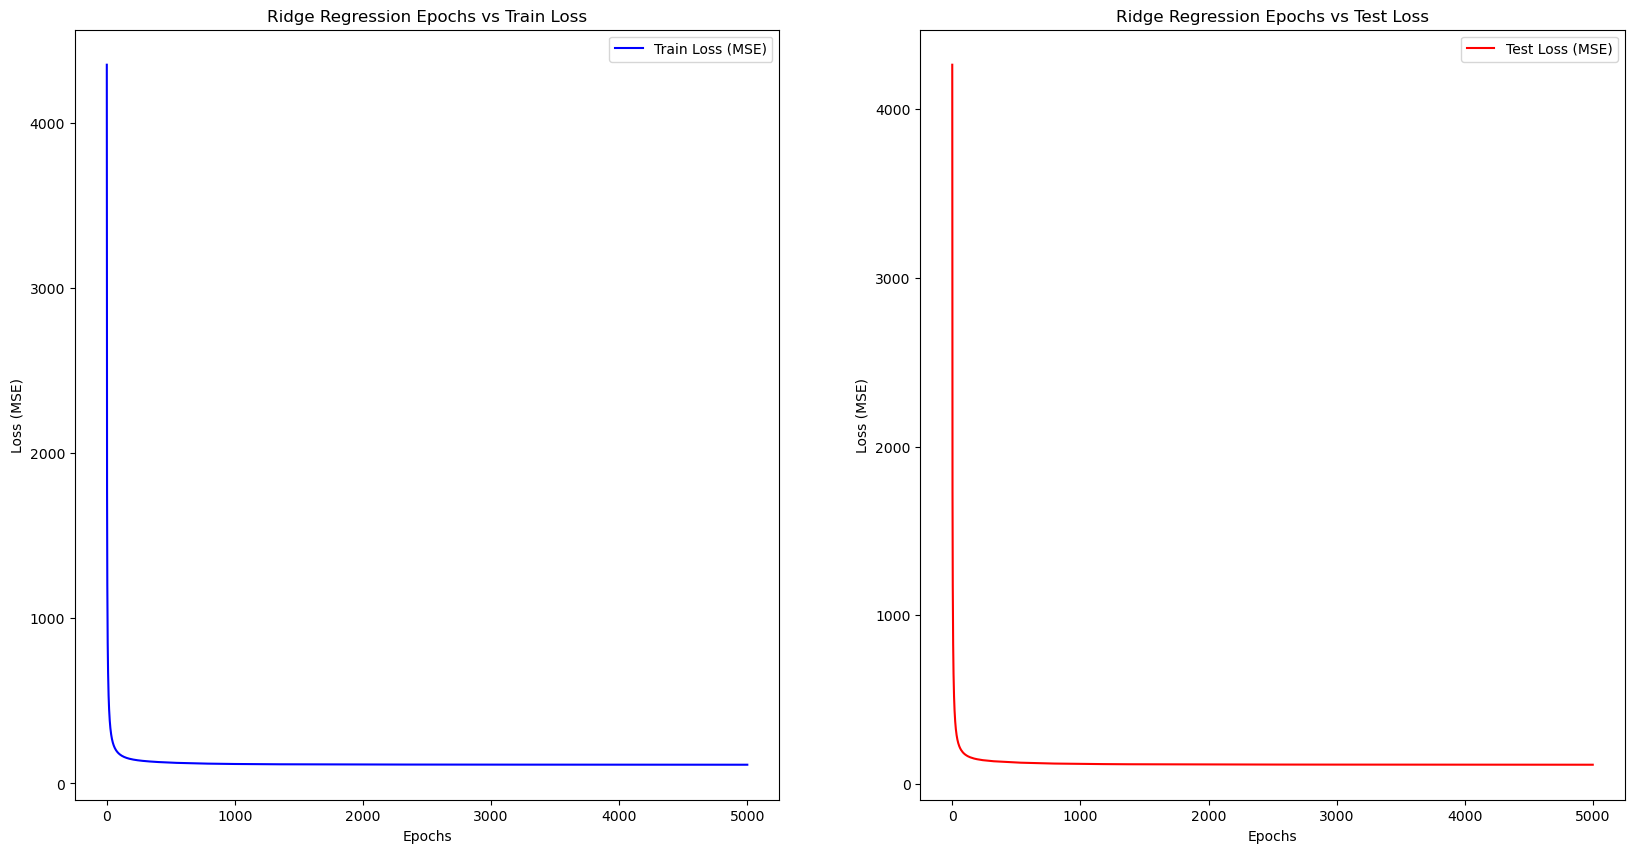

In [34]:
epochs_regression = [i for i in range(5000)]
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs_regression, loss_train, color='b', label='Train Loss (MSE)')
plt.title('Ridge Regression Epochs vs Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_regression, loss_test, color='r', label='Test Loss (MSE)')
plt.title('Ridge Regression Epochs vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
fig.savefig('ridge_regression_epochs_vs_loss.png')
plt.show()

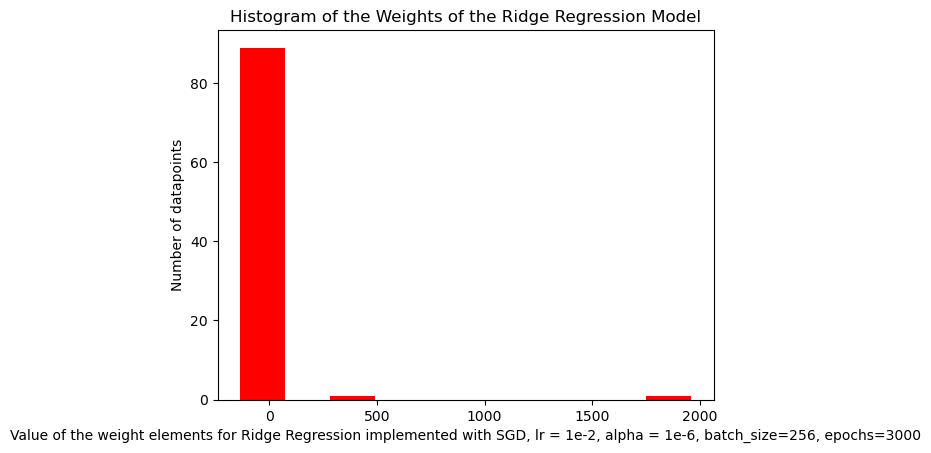

In [35]:
plt.title('Histogram of the Weights of the Ridge Regression Model')
plt.hist(W_sgd_L2loss_L2decay, color='r')
plt.ylabel('Number of datapoints')
plt.xlabel('Value of the weight elements for Ridge Regression implemented with SGD, lr = 1e-2, alpha = 1e-6, batch_size=256, epochs=5000')
plt.show()

We can observe that the weights for Tikhonov Regression implemented with the pseudoinverse method and Ridge Regression implemented with SGD after 5000 epochs, learning rate = 1e-2, batch size = 256 are largely identical with Ridge Regression having slightly smaller weights overall. It can be observed that the Ridge Regression implementation, implemented with SGD and L2 decay approaches close enough to the optimal MSE, achieving an MSE of 113.67 on the training set as opposed to the optimal MSE of 91.34 and achieves an MSE of 114.23 on the test set as opposed to the optimal of 90.54. Similarly, Ridge Regression implemented with SGD without any decay achieved an MSE of 109.24 on the training set and an MSE of 109.77 on the test set.

## IMPLEMENTING LASSO REGRESSION

In [36]:
W_sgd_L2loss_L1_decay, loss_sgd_L1_decay_train, loss_sgd_L1decay_test = mini_batch_sgd(X=normalized_train_feats, y=trainYears, X_test=normalized_test_feats, y_test=testYears, batch_size=256, weight_decay_type='L1')

Epoch 1/5000 - TRAIN - loss: 4351.0541

Epoch 1/5000 - EVAL - loss: 4263.4050





Epoch 101/5000 - TRAIN - loss: 174.1557

Epoch 101/5000 - EVAL - loss: 172.2489





Epoch 201/5000 - TRAIN - loss: 142.5142

Epoch 201/5000 - EVAL - loss: 142.6205





Epoch 301/5000 - TRAIN - loss: 132.0742

Epoch 301/5000 - EVAL - loss: 132.7925





Epoch 401/5000 - TRAIN - loss: 126.4128

Epoch 401/5000 - EVAL - loss: 127.3317





Epoch 501/5000 - TRAIN - loss: 122.5980

Epoch 501/5000 - EVAL - loss: 123.5781





Epoch 601/5000 - TRAIN - loss: 119.8032

Epoch 601/5000 - EVAL - loss: 120.8073





Epoch 701/5000 - TRAIN - loss: 117.7622

Epoch 701/5000 - EVAL - loss: 118.7585





Epoch 801/5000 - TRAIN - loss: 116.2079

Epoch 801/5000 - EVAL - loss: 117.1633





Epoch 901/5000 - TRAIN - loss: 115.0095

Epoch 901/5000 - EVAL - loss: 115.9252





Epoch 1001/5000 - TRAIN - loss: 114.0891

Epoch 1001/5000 - EVAL - loss: 114.9961





Epoch 1101/5000 - TRAIN - loss: 113.3847

Epoch 1101/5000 - EVAL 

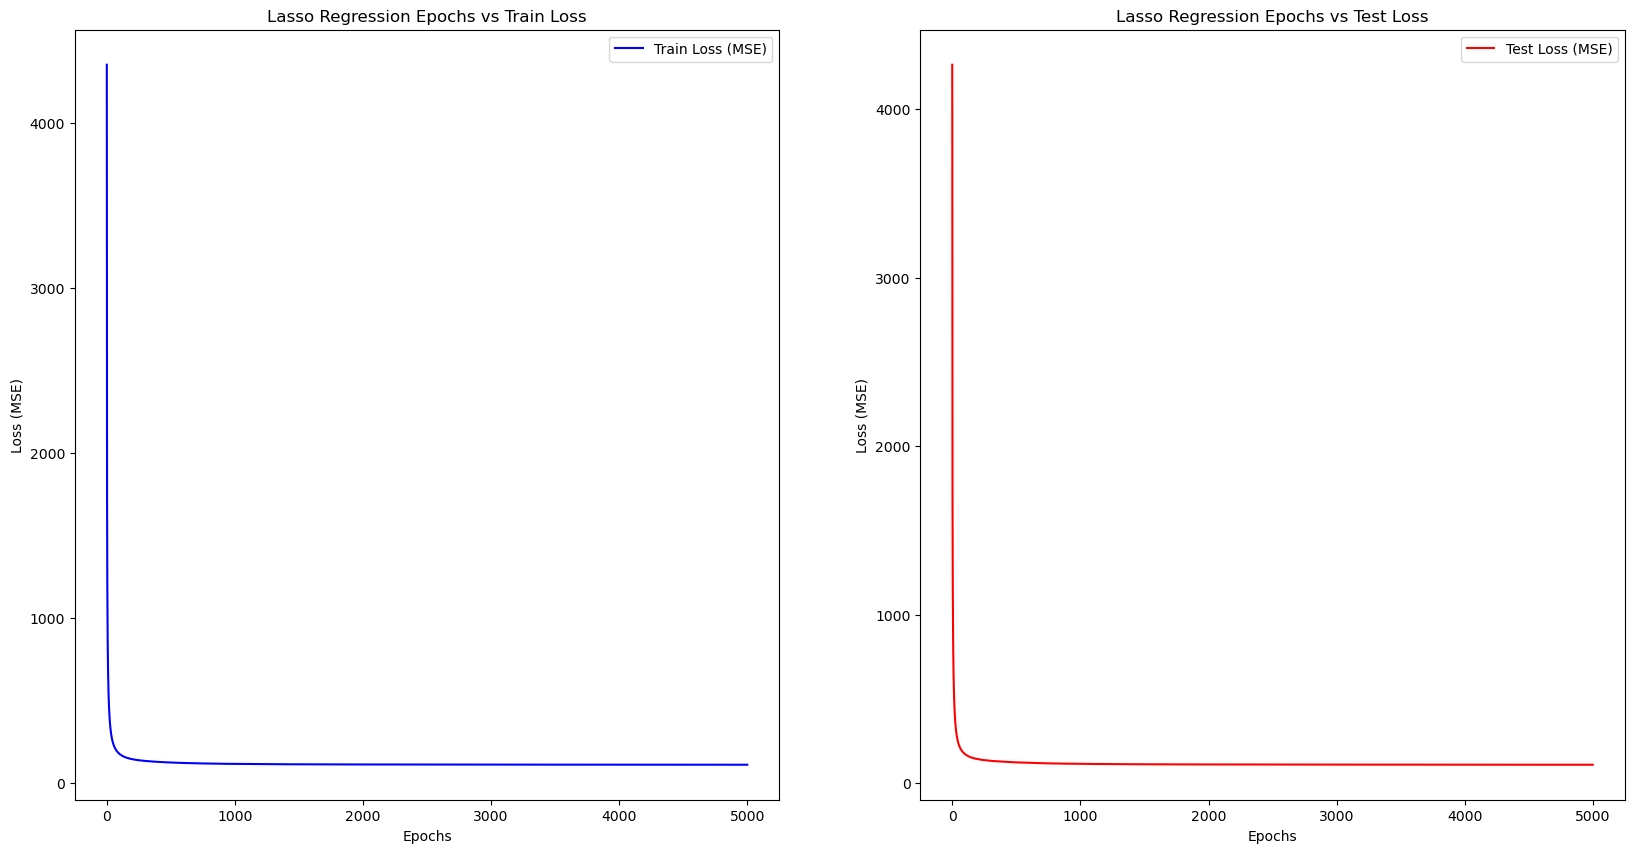

In [37]:
epochs_regression = [i for i in range(5000)]
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs_regression, loss_sgd_L1_decay_train, color='b', label='Train Loss (MSE)')
plt.title('Lasso Regression Epochs vs Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_regression, loss_sgd_L1decay_test, color='r', label='Test Loss (MSE)')
plt.title('Lasso Regression Epochs vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
fig.savefig('lasso_regression_epochs_vs_loss.png')
plt.show()

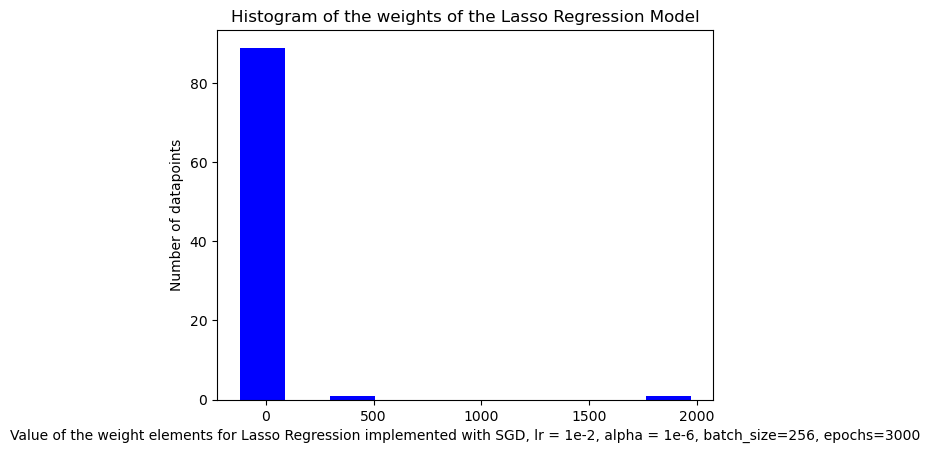

In [38]:
plt.title('Histogram of the weights of the Lasso Regression Model')
plt.hist(W_sgd_L2loss_L1_decay, color='b')
plt.ylabel('Number of datapoints')
plt.xlabel('Value of the weight elements for Lasso Regression implemented with SGD, lr = 1e-2, alpha = 1e-6, batch_size=256, epochs=3000')
plt.show()

Lasso Regression model implemented with SGD with lr = 1e-2, batch size = 256, weight decay factor = 1e-6 with L1 weight decay achieved an MSE of 109.24 on the training set and an MSE of 109.77 on the test set after 5000 epochs identical to the results achieved by the Ridge Regression model with no weight decay. It can also be noted that the weight histograms of both these models look more or less identical.

Comparing all of the regression models together, it was observed that the Tikhonov Regression model implemented with the pseudoinverse methode provided the optimal performance while those implemented using SGD tried to converge to the optimal value achieving an MSE score of 109.77 after 5000 epochs. This score was achieved by Ridge Regression model with no weight decay and the Lasso Regression model with L1 decay. The Ridge Regression model with L2 decay performed the worst out of all the models.

## Part 5 - Implementing Count Regression (6 points)

In [39]:
def count_regression_mini_batch_sgd(X, y, X_test, y_test, epochs=1500, lr=1e-6, batch_size=2000, alpha=1e-6, weight_decay_type=None, lr_decay=0.1):
    W = np.zeros(X.shape[1])
    b = 0
    losses_train = []
    losses_MSE_train = []
    epochs_for_decay = [1000, 1490]
    losses_test = []
    losses_MSE_test = []
    for ep in range(epochs):

        if (ep in epochs_for_decay and lr > 1e-15):
            lr = lr*lr_decay
            print(f'Learning Rate reduced to {lr}')
            print('\n')

        for batch in range(0, X.shape[0], batch_size):
            X_batch = X[batch:batch+batch_size]
            y_batch = y[batch:batch+batch_size]
            
            y_hat_batch = X_batch @ W + b
            y_pred_batch = np.exp(y_hat_batch - np.max(y_hat_batch))
            
            if(weight_decay_type == None):
                penalty_grad = 0
                
            elif(weight_decay_type=='L2'):
                penalty_grad = 2*alpha*W
                
            else:
                penalty_grad = alpha*np.sign(W)
                
            grad_w = (X_batch.T @ (y_pred_batch - y_batch))/batch_size + penalty_grad
            grad_b = (y_pred_batch - y_batch).mean()
            W -= lr*grad_w
            b -= lr*grad_b

        
        if(weight_decay_type == None):
            penalty = 0
                
        elif(weight_decay_type=='L2'):
            penalty= alpha*np.linalg.norm(W)**2
                
        else:
            penalty = alpha*np.sum(np.abs(W))
            
        y_hat_train = X @ W + b
        y_pred_train = np.exp(y_hat_train - np.max(y_hat_train))
        loss_train = -np.mean(y_pred_train - y_pred_train*y) + penalty
        loss_MSE_train = musicMSE(y_hat_train, y) + penalty
        losses_train.append(loss_train)
        losses_MSE_train.append(loss_MSE_train)
        
        y_hat_test = X_test @ W + b
        y_pred_test = np.exp(y_hat_test - np.max(y_hat_test))
        loss_test = -np.mean(y_pred_test - y_pred_test*y_test) + penalty
        loss_MSE_test = musicMSE(y_hat_test, y_test) + penalty
        losses_test.append(loss_test)
        losses_MSE_test.append(loss_MSE_test)
        
        if (ep % 5 == 0):
            print("Epoch {}/{} - TRAINING - negative log likelihood loss: {:.4f} ; MSE loss: {:.4f}".format(ep+1, epochs, loss_train, loss_MSE_train))
            print("Epoch {}/{} - EVAL - negative log likelihood loss: {:.4f} ; MSE loss: {:.4f}".format(ep+1, epochs, loss_test, loss_MSE_test))
            print('\n')
    return W, b, losses_train, losses_test, losses_MSE_train, losses_MSE_test

In [40]:
train_years, train_feats_no_bias, test_years , test_feats_no_bias = loadMusicData(addBias=False)
train_feats_no_bias.shape

(463714, 90)

In [41]:
train_feats_no_bias_norm = (train_feats_no_bias - train_feats_no_bias.min())/(train_feats_no_bias.max() - train_feats_no_bias.min())
test_feats_no_bias_norm = (test_feats_no_bias - train_feats_no_bias.min())/(train_feats_no_bias.max() - train_feats_no_bias.min())

In [42]:
W_sgd_count_loss_no_decay, b, losses_train_count_regression_no_decay, losses_test_count_regression_no_decay, losses_MSE_train, losses_MSE_test = count_regression_mini_batch_sgd(X=train_feats_no_bias_norm, y=train_years, X_test=test_feats_no_bias_norm, y_test=test_years, lr=1e-6,batch_size=2000,weight_decay_type=None)

Epoch 1/1500 - TRAINING - negative log likelihood loss: 1745.3705 ; MSE loss: 3985677.0441

Epoch 1/1500 - EVAL - negative log likelihood loss: 1825.4215 ; MSE loss: 3986113.7336





Epoch 6/1500 - TRAINING - negative log likelihood loss: 889.7631 ; MSE loss: 3949654.4191

Epoch 6/1500 - EVAL - negative log likelihood loss: 1164.1741 ; MSE loss: 3950076.2162





Epoch 11/1500 - TRAINING - negative log likelihood loss: 454.0685 ; MSE loss: 3910174.2210

Epoch 11/1500 - EVAL - negative log likelihood loss: 743.2685 ; MSE loss: 3910606.7457





Epoch 16/1500 - TRAINING - negative log likelihood loss: 231.9910 ; MSE loss: 3873533.2644

Epoch 16/1500 - EVAL - negative log likelihood loss: 475.0990 ; MSE loss: 3873922.4878





Epoch 21/1500 - TRAINING - negative log likelihood loss: 118.6788 ; MSE loss: 3835370.0059

Epoch 21/1500 - EVAL - negative log likelihood loss: 304.0717 ; MSE loss: 3835799.1394





Epoch 26/1500 - TRAINING - negative log likelihood loss: 60.7977 ; MSE loss: 3798

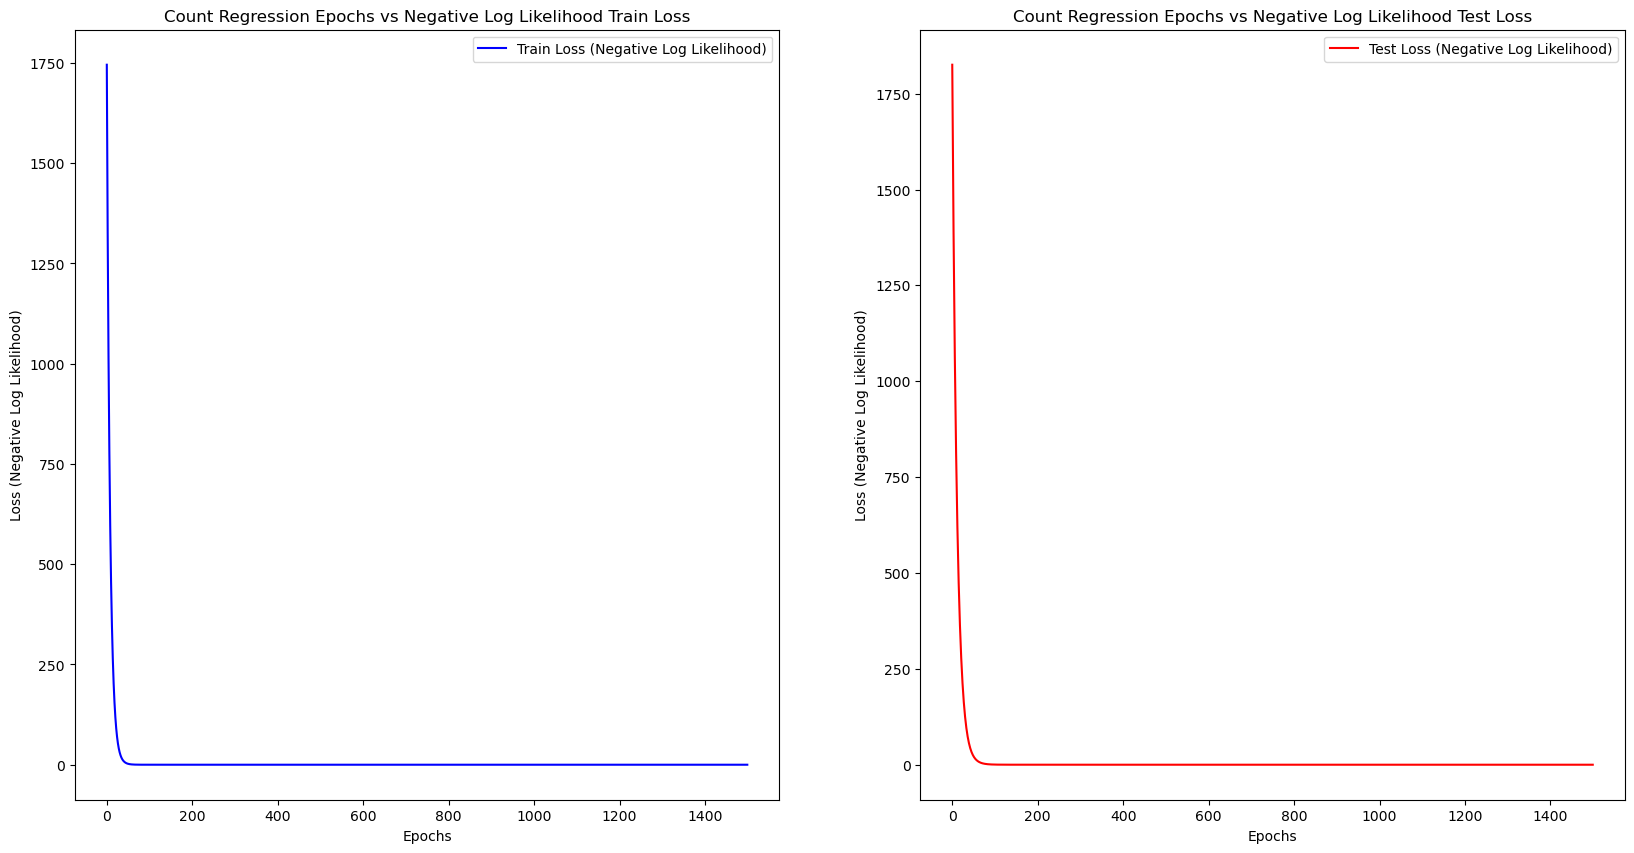

In [43]:
import matplotlib.pyplot as plt
epochs_regression = [i for i in range(1500)]
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs_regression, losses_train_count_regression_no_decay, color='b', label='Train Loss (Negative Log Likelihood)')
plt.title('Count Regression Epochs vs Negative Log Likelihood Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Negative Log Likelihood)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_regression, losses_test_count_regression_no_decay, color='r', label='Test Loss (Negative Log Likelihood)')
plt.title('Count Regression Epochs vs Negative Log Likelihood Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Negative Log Likelihood)')
plt.legend()
fig.savefig('count_regression_epochs_vs_loss.png')
plt.show()

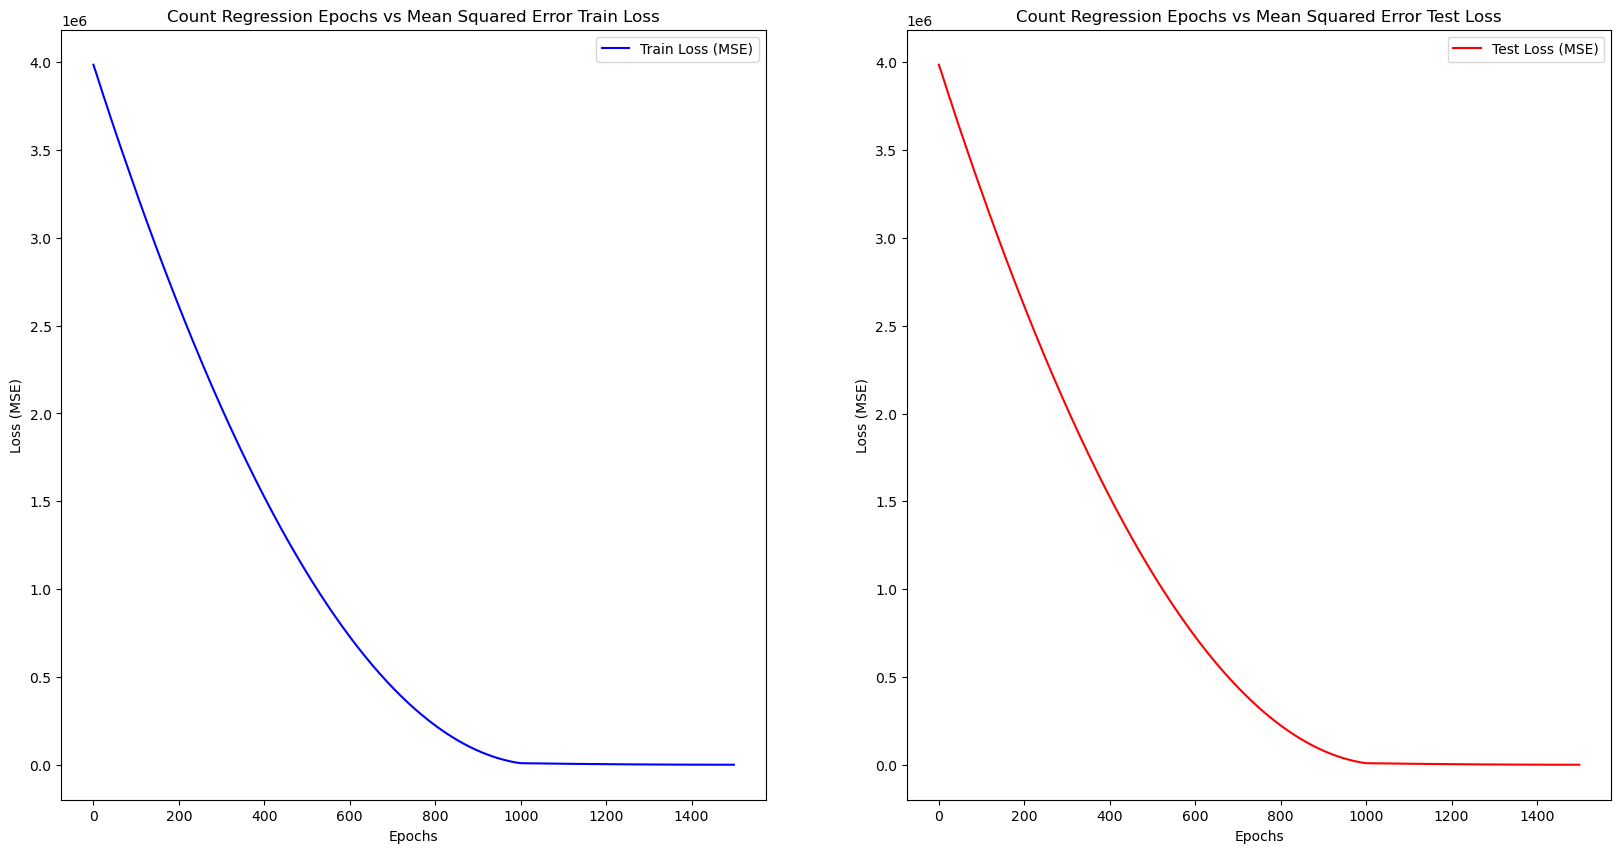

In [44]:
epochs_regression = [i for i in range(1500)]
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs_regression, losses_MSE_train, color='b', label='Train Loss (MSE)')
plt.title('Count Regression Epochs vs Mean Squared Error Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_regression, losses_MSE_test, color='r', label='Test Loss (MSE)')
plt.title('Count Regression Epochs vs Mean Squared Error Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
fig.savefig('count_regression_epochs_vs_loss.png')
plt.show()

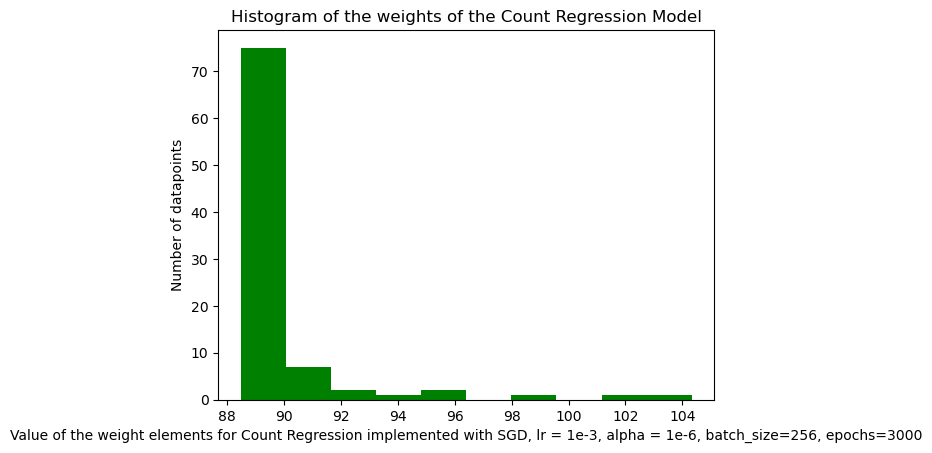

In [45]:
plt.title('Histogram of the weights of the Count Regression Model')
plt.hist(W_sgd_count_loss_no_decay, color='g')
plt.ylabel('Number of datapoints')
plt.xlabel('Value of the weight elements for Count Regression implemented with SGD, lr = 1e-6, batch_size=2000, epochs=1500')
plt.show()

## Part 6 - Model Comparison (10 points)

Comparing the weight histogram plots of Ridge Regression, Lasso Regression and Count Regression, we notice that while Ridge and Lasso look nearly identical in the distribution of their weights, Count Regression has some differences. We can see that there are no weights around 500 and neither can we see any distribution of the weights close to the value of 2000.

The Hyperparameters utilised for -
* Ridge Regression - Learning Rate = 1e-2 ; Batch Size = 256; Weight Decay Factor = 1e-6
* Lasso Regression - Learning Rate = 1e-2 ; Batch Size = 256; Weight Decay Factor = 1e-6
* Count Regression - Learning Rate = 1e-6 with learning rate decay ; Batch Size = 2000; No Weight Decay

Judging by the Mean Squared Error loss achieved on the Test set, we can notice that the Lasso regression model outperforms the Ridge and Count Regression models. It was noted that regularization was not beneficial for Count Regression, and the count regression model requires a low learning rate and a big batch size.

We will now analyse the most common predictions made by each of the regression models

In [46]:
prediction_count_regression = test_feats_no_bias_norm @ W_sgd_count_loss_no_decay + b
prediction_count_regression = (np.rint(prediction_count_regression)).astype(int)
most_common_year_count_regression = np.bincount(prediction_count_regression).argmax()
most_common_year_count_regression

1995

In [47]:
prediction_count_regression.mean()

1998.3740001162093

In [48]:
prediction_count_regression.std()

6.815048707078988

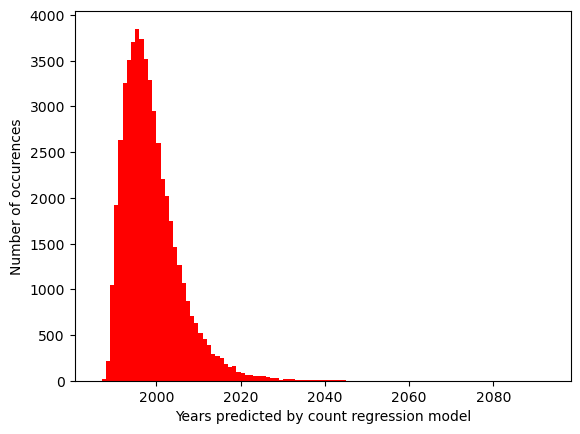

In [49]:
plt.hist(prediction_count_regression, bins=np.unique(prediction_count_regression), color='r')
plt.xlabel('Years predicted by count regression model')
plt.ylabel('Number of occurences')
plt.show()

It can be seen that the mean of the predictions made by the count regression model is 1998 while the standard deviation is approximately 7. It can be observed that in comparison to the distribution of the testYears data above, the count regression model is heavily skewed towards the right, i.e towards an increasing years and is the only model that predicts movies to be in the 2020s. Additionally, compared to the other models it seems to provide less predictions for the pre-2000 datapoints

In [50]:
test_years

array([2007, 2007, 2003, ..., 2006, 2006, 2005])

The most common year predicted by the Count Regression model is 1995

In [51]:
print(f'MSE for Count Regression on Test Set: {musicMSE(prediction_count_regression, testYears)}')

MSE for Count Regression on Test Set: 158.73759950417386


As we can see, the Count Regression model is the closest to the optimal model obtained from Tikhonov Regression by taking the Pseudo Inverse and has the lowest error out of all 3 regression models implemented with the help of SGD

In [52]:
prediction_ridge_regression = normalized_test_feats @ W_sgd_L2loss_L2decay
prediction_ridge_regression = (np.rint(prediction_ridge_regression)).astype(int)
most_common_year_ridge_regression = np.bincount(prediction_ridge_regression).argmax()
most_common_year_ridge_regression

1998

In [53]:
prediction_ridge_regression.mean()

1994.7668648680058

In [54]:
prediction_ridge_regression.std()

5.59125429091226

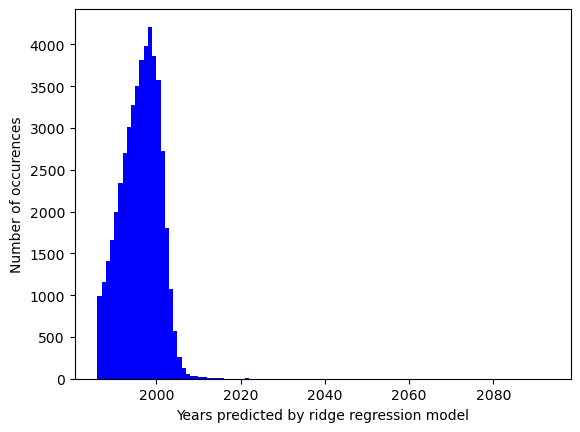

In [55]:
plt.hist(prediction_ridge_regression, bins=np.unique(prediction_count_regression), color='b')
plt.xlabel('Years predicted by ridge regression model')
plt.ylabel('Number of occurences')
plt.show()

The most common year predicted by the Ridge Regression model is 1998

In [56]:
print(f'MSE for Ridge Regression on Test Set: {musicMSE(prediction_ridge_regression, testYears)}')

MSE for Ridge Regression on Test Set: 110.15597218725185


In [57]:
prediction_lasso_regression = normalized_test_feats @ W_sgd_L2loss_L1_decay
prediction_lasso_regression = (np.rint(prediction_lasso_regression)).astype(int)
most_common_year_lasso_regression = np.bincount(prediction_lasso_regression).argmax()
most_common_year_lasso_regression

1998

In [58]:
prediction_lasso_regression.mean()

1994.8035676241018

In [59]:
prediction_lasso_regression.std()

5.615310430986277

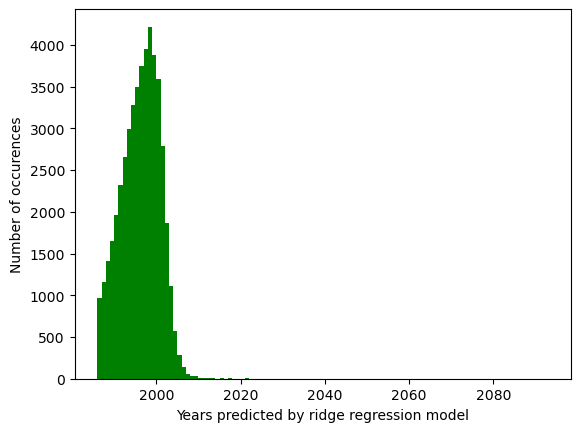

In [60]:
plt.hist(prediction_lasso_regression, bins=np.unique(prediction_count_regression), color='g')
plt.xlabel('Years predicted by ridge regression model')
plt.ylabel('Number of occurences')
plt.show()

The most common year predicted by Lasso Regression is also 1998. The predictions of the Lasso and Ridge regression models also have an identical mean and standard deviation. This is intuitive owing to the identical distribution of the weights of lasso regression and ridge regression models.

In [61]:
print(f'MSE for Lasso Regression on Test Set: {musicMSE(prediction_lasso_regression, testYears)}')

MSE for Lasso Regression on Test Set: 109.75204818810404


In [62]:
prediction_tikhonov_regression = normalized_test_feats @ W
prediction_tikhonov_regression = (np.rint(prediction_tikhonov_regression)).astype(int)
most_common_year_tikhonov_regression = np.bincount(prediction_tikhonov_regression).argmax()
most_common_year_tikhonov_regression

2001

In [63]:
prediction_tikhonov_regression.mean()

1998.478181712537

In [64]:
prediction_tikhonov_regression.std()

5.324250492720658

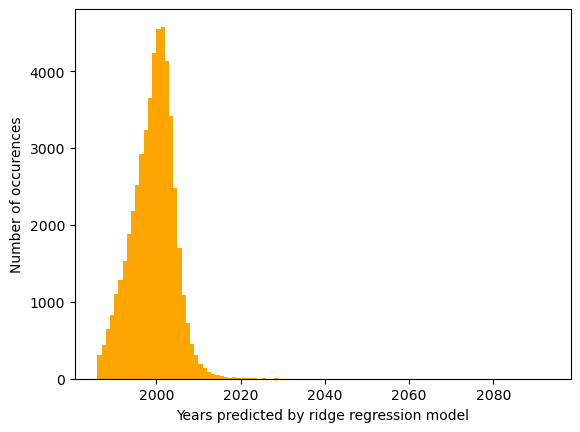

In [65]:
plt.hist(prediction_tikhonov_regression, bins=np.unique(prediction_count_regression), color='orange')
plt.xlabel('Years predicted by ridge regression model')
plt.ylabel('Number of occurences')
plt.show()

The optimal weights calculated with the help of the pseudo-inverse provide the most common prediction as 2001. 

# SOFTMAX

## Problem 5 - Softmax Properties

### Part 1 (7 points)

Recall the softmax function, which is the most common activation function used for the output of a neural network trained to do classification. In a vectorized form, it is given by
\begin{equation*}
\operatorname{softmax} \left( {\mathbf{a}} \right) = \frac{{\exp \left( {\mathbf{a}} \right)}}
{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j } \right)} }},
\end{equation*}
where $\mathbf{a}\in \mathbb{R}^K$. The $\exp$ function in the numerator is applied element-wise and $a_j$ denotes the $j$'th element of $\mathbf{a}$.

Show that the softmax function is invariant to constant offsets to its input, i.e., 
$
\operatorname{softmax} \left( {{\mathbf{a}} + {c\mathbf{1}}} \right) = \operatorname{softmax} \left( {\mathbf{a}} \right),
$
where $c\in \mathbb{R}$ is some constant and $\mathbf{1}$ denotes a column vector of 1's.


**SOLUTION:**

Let $\mathbf{a}\in \mathbb{R}^K$ be the input to the softmax and let $\mathbf{a}' = \mathbf{a} + {c\mathbf{1}}$ where $c\in \mathbb{R}$ is a constant. Therefore $\mathbf{c}\in \mathbb{R}^K$ becomes a constant vector.

$\operatorname{softmax} \left({\mathbf{a}'} \right)_i = \operatorname{softmax} \left({\mathbf{a + c}} \right)_i = \frac{{\exp \left( {\mathbf{a_i} + \mathbf{c}} \right)}}
{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j + c} \right)} }} = \frac{{\exp \left( {\mathbf{a_i}} \right)} {\exp \left( {\mathbf{c}} \right)}}
{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j } \right)} {\exp \left( {c } \right)} }} = \frac{{\exp \left( {\mathbf{a}} \right)}}
{{\sum\nolimits_{j = 1}^K {\exp \left( {a_j } \right)} }} = \operatorname{softmax} \left({\mathbf{a}} \right)$

### Part 2 (3 points)

In practice, why is the observation that the softmax function is invariant to constant offsets to its input important when implementing it in a neural network?

**SOLUTION:**

The invariance of the softmax function to constant offsets is crucial to its applications in a neural network since it allows the neural network to be more robust to changes. This is especially important considering that the softmax is utilised in the final layer of the neural network. If the softmax function was not invariant to constant offsets then small changes in the input data would result in large changes to the output probabilities, adversely affecting the performance of the neural network. Since the softmax is invariant to constant offsets, a constant shift in the input data does not change the output probabilities of the neural network.

## Problem 6 - Implementing a Softmax Classifier

### Part 1 - Implementation \& Evaluation (20 points)

In [66]:
import numpy as np
def load_iris(trainpath:str='/kaggle/input/dl-hw2/iris-train.txt', testpath:str='/kaggle/input/dl-hw2/iris-test.txt', addBias:bool = True):
    train_data_str = []
    test_data_str = []
    feat_dims = 3 if addBias else 2
    with open(trainpath, 'r') as ftrain:
        for line in ftrain.readlines():
            train_data_str.append(line.split('\n')[0])
            
    with open(testpath, 'r') as ftest:
        for line in ftest.readlines():
            test_data_str.append(line.split('\n')[0])
            
    y_train = np.array([int(line.split(' ')[0]) for line in train_data_str])
    y_test = np.array([int(line.split(' ')[0]) for line in test_data_str])
    
    if addBias:
        train_feats = np.array([[float(line.split(' ')[1]), float(line.split(' ')[2]), 1] for line in train_data_str])
        test_feats = np.array([[float(line.split(' ')[1]), float(line.split(' ')[2]), 1] for line in test_data_str])
    else:
        train_feats = np.array([[float(line.split(' ')[1]), float(line.split(' ')[2])] for line in train_data_str])
        test_feats = np.array([[float(line.split(' ')[1]), float(line.split(' ')[2])] for line in test_data_str])

    return train_feats, test_feats, y_train, y_test

train, test, y_train, y_test = load_iris(addBias=True)

In [67]:
# Min-Max scaling to push values between 1 and -1
normalized_train = (train- train.min())/(train.max() - train.min())
normalized_test = (test - train.min())/(train.max() - train.min())

In [68]:
normalized_train[:,-1] = np.ones(normalized_train.shape[0])
normalized_test[:,-1] = np.ones(normalized_test.shape[0])

In [69]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [70]:
y_train_one_hot = np.zeros((y_train.size, y_train.max() + 1))
y_train_one_hot[np.arange(y_train.size), y_train] = 1

In [71]:
y_test_one_hot = np.zeros((y_test.size, y_test.max() + 1))
y_test_one_hot[np.arange(y_test.size), y_test] = 1

In [72]:
def softmax(x):
    exp = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp/np.sum(exp, axis=1, keepdims=True)

def categorical_cross_entropy(y, y_pred):
    loss = -np.mean(y*np.log(y_pred))  # Negative since we want to maximise the log likelihood, so we take the negative and minimize the negative log likelihood
    return loss

def binary_cross_entropy(y, y_pred):
    loss = -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return loss

def mean_per_class_accuracy(y, y_pred):
    per_class_acc = np.zeros(y_pred.shape[1])
    
    for idx in range(y_pred.shape[1]):
        boolean_mask = np.where(y[:, idx] == 1)[0]
        if len(boolean_mask) > 0:
            per_class_acc[idx] = np.mean(np.argmax(y_pred[boolean_mask, :], axis=1) == idx)
    return np.mean(per_class_acc)
    
def mini_batch_sgd_softmax_classifier(X, y, X_test, y_test, epochs=1000, lr=1e-1, alpha=1e-6, batch_size=64, momentum=0.9, weight_decay_type=None):
    W = np.random.randn(X.shape[1],y.shape[1])
    v_w = np.zeros((X.shape[1], y.shape[1]))
    losses = []
    accuracies = []
    losses_test = []
    accuracies_test = []
    per_class_accs_train = []
    per_class_accs_test = []
    for ep in range(epochs):
        for batch in range(0, X.shape[0], batch_size):
            X_batch = X[batch:batch+batch_size]
            y_batch = y[batch:batch+batch_size]
            
            logits = X_batch @ W
            probabilities = softmax(logits)
            if(weight_decay_type == None):
                penalty_grad = 0
                
            elif(weight_decay_type=='L2'):
                penalty_grad = 2*alpha*W
                
            else:
                penalty_grad = alpha*np.sign(W)
                
            dW = (X_batch.T @ (probabilities-y_batch))/batch_size + penalty_grad
            v_w = momentum * v_w + lr*dW  # V_t = V_t-1*beta + lr*dW            
            W -= v_w

        y_pred = softmax(X @ W)
        loss = categorical_cross_entropy(y, y_pred)
        accuracy = np.mean(np.argmax(y_pred, axis=1)==np.argmax(y, axis=1))
        accuracies.append(accuracy)
        per_class_acc_train = mean_per_class_accuracy(y, y_pred)
        per_class_accs_train.append(per_class_acc_train)
        
        
        if(weight_decay_type == None):
            penalty = 0

        elif(weight_decay_type=='L2'):
            penalty = alpha*np.linalg.norm(W)**2
                
        else:
            penalty = alpha*np.sum(np.abs(W))
        
        loss += penalty
        losses.append(loss)
        
        
        
        y_test_pred = softmax(X_test @ W)
        loss_test = categorical_cross_entropy(y_test, y_test_pred) + penalty
        accuracy_test = np.mean(np.argmax(y_test_pred, axis=1)==np.argmax(y_test, axis=1))
        accuracies_test.append(accuracy_test)
        per_class_acc_test = mean_per_class_accuracy(y_test, y_test_pred)
        per_class_accs_test.append(per_class_acc_test)
        losses_test.append(loss_test)
        
        if(ep % 5 ==0):
            print("Epoch {}/{} - TRAINING - loss: {:.4f} - accuracy: {:.4f} - mean per class accuracy {:.4f}".format(ep+1, epochs, loss, accuracy, per_class_acc_train))
            print("Epoch {}/{} - EVAL - loss: {:.4f} - accuracy: {:.4f} - mean per class accuracy {:.4f}".format(ep+1, epochs, loss_test, accuracy_test, per_class_acc_test))
            print('\n')
    return W, losses, accuracies, per_class_accs_train,losses_test, accuracies_test, per_class_accs_test

def mini_batch_sgd_softmax_with_bias(X, y, X_test, y_test, epochs=1000, lr=1e-2, alpha=1e-6, batch_size=256, momentum=0.9, weight_decay_type=None):
    W = np.random.randn(X.shape[1],y.shape[1])
    b = np.random.randn(y.shape[1])
    v_w = np.zeros((X.shape[1], y.shape[1]))
    v_b = np.zeros(y.shape[1])
    losses = []
    accuracies = []
    losses_test = []
    accuracies_test = []
    per_class_accs_train = []
    per_class_accs_test = []
    for ep in range(epochs):
        for batch in range(0, X.shape[0], batch_size):
            X_batch = X[batch:batch+batch_size]
            y_batch = y[batch:batch+batch_size]
            
            logits = X_batch @ W + b
            probabilities = softmax(logits)
            if(weight_decay_type == None):
                penalty_grad = 0
                penalty_grad_b = 0
                
            elif(weight_decay_type=='L2'):
                penalty_grad = 2*alpha*W
                penalty_grad_b = 2*alpha*b
                
            else:
                penalty_grad = alpha*np.sign(W)
                penalty_grad_b = alpha*np.sign(b)
                
            dW = (X_batch.T @ (probabilities-y_batch))/batch_size + penalty_grad
            db = np.mean(probabilities - y_batch) + penalty_grad_b
            v_w = momentum * v_w + lr*dW  # V_t = V_t-1*beta + lr*dW
            v_b = momentum * v_b + lr*db
            
            W -= v_w 
            b -= v_b

        y_pred = softmax(X @ W + b)
        loss = categorical_cross_entropy(y, y_pred)
        accuracy = np.mean(np.argmax(y_pred, axis=1)==np.argmax(y, axis=1))
        accuracies.append(accuracy)
        per_class_acc_train = mean_per_class_accuracy(y, y_pred)
        per_class_accs_train.append(per_class_acc_train)
        
        
        if(weight_decay_type == None):
            penalty = 0
                
        elif(weight_decay_type=='L2'):
            penalty = alpha*np.linalg.norm(W)**2
                
        else:
            penalty = alpha*np.sum(np.abs(W))
        
        loss += penalty
        losses.append(loss)
        
        
        
        y_test_pred = softmax(X_test @ W + b)
        loss_test = categorical_cross_entropy(y_test, y_test_pred) + penalty
        accuracy_test = np.mean(np.argmax(y_test_pred, axis=1)==np.argmax(y_test, axis=1))
        accuracies_test.append(accuracy_test)
        per_class_acc_test = mean_per_class_accuracy(y_test, y_test_pred)
        per_class_accs_test.append(per_class_acc_test)
        losses_test.append(loss_test)
        
        if(ep % 5 ==0):
            print("Epoch {}/{} - TRAINING - loss: {:.4f} - accuracy: {:.4f} - mean per class accuracy {:.4f}".format(ep+1, epochs, loss, accuracy, per_class_acc_train))
            print("Epoch {}/{} - EVAL - loss: {:.4f} - accuracy: {:.4f} - mean per class accuracy {:.4f}".format(ep+1, epochs, loss_test, accuracy_test, per_class_acc_test))
            print('\n')
    return W, b, losses, accuracies, per_class_accs_train,losses_test, accuracies_test, per_class_accs_test

def softmax_regression_predict(W, X_test, y_test):
    y_pred = softmax(X_test @ W)
    loss = categorical_cross_entropy(y_test, y_pred)
    acc = np.mean(np.argmax(y_pred, axis=1)==np.argmax(y_test, axis=1))
    print(f'Performance on Test Set - Accuracy:{acc} ; Loss:{loss}')
    return loss, acc

In [73]:
W, loss, accs, per_class_accs, loss_test, acc_test, per_class_accs_test = mini_batch_sgd_softmax_classifier(X=normalized_train, y=y_train_one_hot, X_test=normalized_test, y_test=y_test_one_hot)

Epoch 1/1000 - TRAINING - loss: 0.3250 - accuracy: 0.3222 - mean per class accuracy 0.2417

Epoch 1/1000 - EVAL - loss: 0.3245 - accuracy: 0.2941 - mean per class accuracy 0.2500





Epoch 6/1000 - TRAINING - loss: 0.2745 - accuracy: 0.4778 - mean per class accuracy 0.3583

Epoch 6/1000 - EVAL - loss: 0.2624 - accuracy: 0.5294 - mean per class accuracy 0.3667





Epoch 11/1000 - TRAINING - loss: 0.2573 - accuracy: 0.4222 - mean per class accuracy 0.3167

Epoch 11/1000 - EVAL - loss: 0.2436 - accuracy: 0.5294 - mean per class accuracy 0.3604





Epoch 16/1000 - TRAINING - loss: 0.2473 - accuracy: 0.4333 - mean per class accuracy 0.3250

Epoch 16/1000 - EVAL - loss: 0.2343 - accuracy: 0.4902 - mean per class accuracy 0.3365





Epoch 21/1000 - TRAINING - loss: 0.2393 - accuracy: 0.4333 - mean per class accuracy 0.3250

Epoch 21/1000 - EVAL - loss: 0.2228 - accuracy: 0.5294 - mean per class accuracy 0.3635





Epoch 26/1000 - TRAINING - loss: 0.2332 - accuracy: 0.5778 - mean per clas

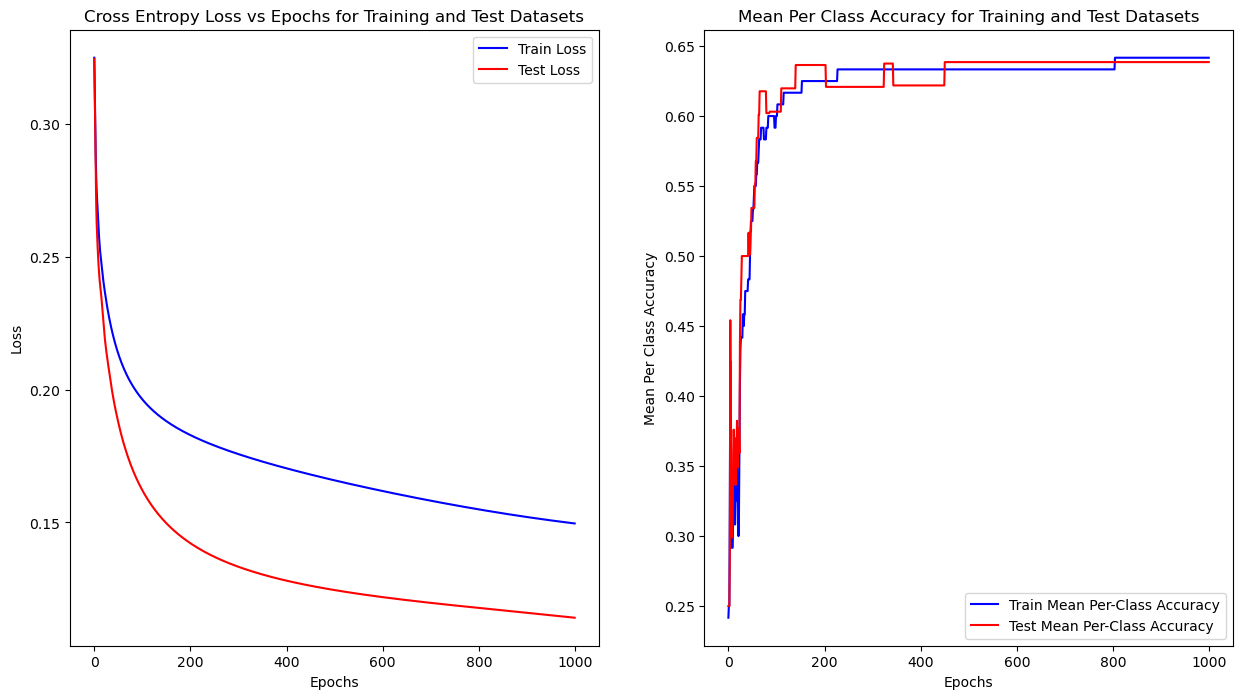

In [74]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1000)]

fig = plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, loss_test, color='r', label='Test Loss')
plt.title('Cross Entropy Loss vs Epochs for Training and Test Datasets')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, per_class_accs, color='b', label='Train Mean Per-Class Accuracy')
plt.plot(epochs, per_class_accs_test, color='r', label='Test Mean Per-Class Accuracy')
plt.title('Mean Per Class Accuracy for Training and Test Datasets')
plt.xlabel('Epochs')
plt.ylabel('Mean Per Class Accuracy')
plt.legend()

fig.savefig('softmax_regression_results.png')
plt.show()

Best Test Accuracy Achieved by Softmax Regression Model on Iris Dataset = 86.27%, 

Best Test Mean Per Class Accuracy Achieved by Softmax Regression Model on Iris Dataset = 63.85%

**HYPERPARAMETERS USED:**

LEARNING RATE = 1e-1

BATCH SIZE = 64

REGULARIZATION - None

MOMENTUM = 0.9

EPOCHS = 1000

Maximum Test Accuracy Achieved - Mean Per Class Accuract - 63.85%, Accuracy - 86.27% 

Early Stopping would have helped

## Part 2 - Displaying Decision Boundaries (10 points)

In the plots below the decision boundaries for the softmax classifier have been displayed on the training set and the test set. The data has been plotted on the scatter plot and all 3 categories have been labelled with the x and y axis being the two features provided in the training and the test set

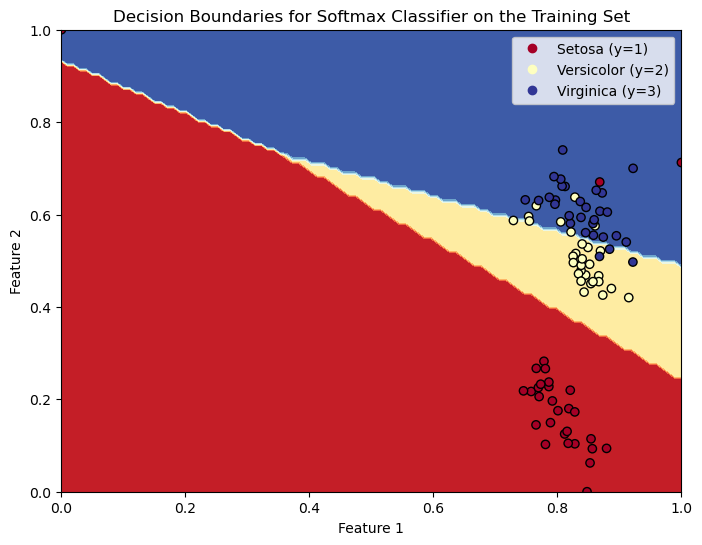

In [75]:
from matplotlib import cm
fig = plt.figure(figsize=(8,6))
x_min, x_max = normalized_train[:,0].min(), normalized_train[:,0].max() # Plotting first feature on x-axis
y_min, y_max = normalized_train[:,1].min(), normalized_train[:,1].max() # Second feature on y-axis
feat1, feat2 = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
ones = np.ones((feat1.ravel().shape[0], 1)) # Column of ones for appending to the sampled X matrix for the bias
preds = softmax(np.c_[feat1.ravel(), feat2.ravel(), ones] @ W) # Sample a matrix X and calculate the predictions of the softmax regression model for it
preds = np.argmax(preds, axis=1) # Take the argmax to convert one hot predictions into a vector of probabilities
preds = preds.reshape(feat1.shape) # Reshape it to a 2D array 
plt.contourf(feat1, feat2, preds, cmap=cm.RdYlBu)
scatter = plt.scatter(normalized_train[:,0], normalized_train[:,1], c=y_train, edgecolors='black', cmap=cm.RdYlBu) # Plotting the training dataset
plt.title('Decision Boundaries for Softmax Classifier on the Training Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa (y=1)', 'Versicolor (y=2)', 'Virginica (y=3)'])
fig.savefig('decision_boundaries_softmax_regression_train.png')
plt.show()

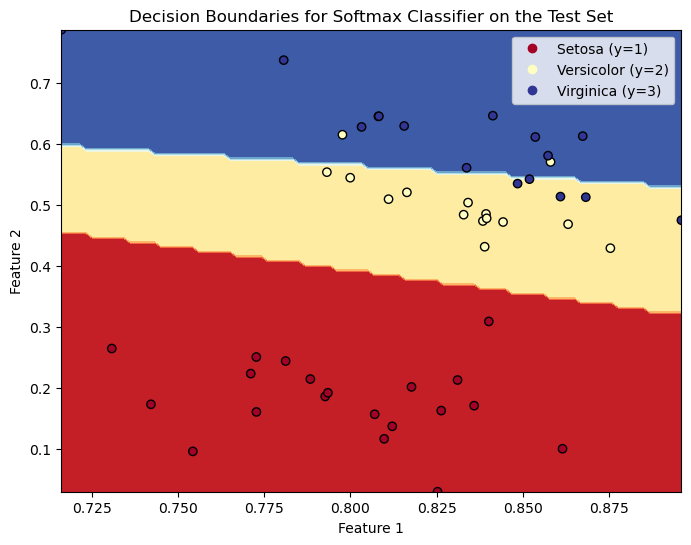

In [76]:
fig = plt.figure(figsize=(8,6))
x_min, x_max = normalized_test[:,0].min(), normalized_test[:,0].max() # Plotting first feature on x-axis
y_min, y_max = normalized_test[:,1].min(), normalized_test[:,1].max() # Second feature on y-axis
feat1, feat2 = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
ones = np.ones((feat1.ravel().shape[0], 1)) # Column of ones for appending to the sampled X matrix for the bias
preds = softmax(np.c_[feat1.ravel(), feat2.ravel(), ones] @ W) # Sample a matrix X and calculate the predictions of the softmax regression model for it
preds = np.argmax(preds, axis=1) # Take the argmax to convert one hot predictions into a vector of probabilities
preds = preds.reshape(feat1.shape) # Reshape it to a 2D array 
plt.contourf(feat1, feat2, preds, cmap=cm.RdYlBu)
scatter = plt.scatter(normalized_test[:,0], normalized_test[:,1], c=y_test, edgecolors='black', cmap=cm.RdYlBu) # Plotting the test dataset
plt.title('Decision Boundaries for Softmax Classifier on the Test Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa (y=1)', 'Versicolor (y=2)', 'Virginica (y=3)'])
fig.savefig('decision_boundaries_softmax_regression_test.png')
plt.show()

## Problem 7 - Classifying Images (10 points)

The CIFAR-10 data has been downloaded from https://www.cs.toronto.edu/~kriz/cifar.html and loaded with the help of the pickle library. The images are taken as vectors and normalised after which the softmax classifier is trained on the training set.

In [77]:
import pickle

num_train_batches = 5

def unpickle_file(file:str ='/kaggle/input/dl-hw2/cifar-10-batches-py/data_batch_1'):
    with open(file,'rb') as f:
        file_loaded_dict = pickle.load(f, encoding='bytes')
    return file_loaded_dict

# Looping through files for batch sizes to load training data
for i in range(1, num_train_batches+1):
    fname = f'/kaggle/input/dl-hw2/cifar-10-batches-py/data_batch_{i}'
    batch_data = unpickle_file(file=fname)
    
    if i==1:
        train_images = batch_data[b'data']
        train_labels = batch_data[b'labels']
    else:
        train_images = np.vstack((train_images, batch_data[b'data']))
        train_labels += batch_data[b'labels']

# Loading the test data
test_data = unpickle_file(file='/kaggle/input/dl-hw2/cifar-10-batches-py/test_batch')
test_images = test_data[b'data']
test_labels = test_data[b'labels']

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# One Hot Encoding the training labels
train_labels_ohe = np.zeros((train_labels.size, train_labels.max()+1))
train_labels_ohe[np.arange(train_labels.size),train_labels] = 1

# One Hot Encoding the test labels
test_labels_ohe = np.zeros((test_labels.size, test_labels.max()+1))
test_labels_ohe[np.arange(test_labels.size),test_labels] = 1

In [78]:
# Normalizing the images
norm_train_images = train_images/255.
norm_test_images = test_images/255.
#norm_train_images = (train_images - train_images.mean())/train_images.std()
#norm_test_images = (test_images - train_images.mean())/train_images.std()

In [79]:
#norm_train_images = np.hstack((norm_train_images.reshape(norm_train_images.shape[0],-1), np.ones((norm_train_images.shape[0], 1)))) # Stacking a column of ones for the bias term for the training set
#norm_train_images.shape

In [80]:
#norm_test_images = np.hstack((norm_test_images.reshape(norm_test_images.shape[0],-1), np.ones((norm_test_images.shape[0], 1)))) # Stacking a column of ones for the bias term for the test set
#norm_test_images.shape

In [81]:
def mini_batch_sgd_softmax_classifier_cifar(X, y, X_test, y_test, epochs=100, lr=1e-2, alpha=1e-6, batch_size=64, momentum=0.9, weight_decay_type='L2'):
    W = np.random.randn(X.shape[1],y.shape[1])
    b = np.random.randn(y.shape[1])
    v_w = np.zeros((X.shape[1], y.shape[1]))
    v_b = np.zeros(y.shape[1])
    losses = []
    accuracies = []
    losses_test = []
    accuracies_test = []
    per_class_accs_train = []
    per_class_accs_test = []
    for ep in range(epochs):
        for batch in range(0, X.shape[0], batch_size):
            X_batch = X[batch:batch+batch_size]
            y_batch = y[batch:batch+batch_size]
            
            logits = X_batch @ W + b
            probabilities = softmax(logits)
            if(weight_decay_type == None):
                penalty_grad = 0
                penalty_grad_b = 0
                
            elif(weight_decay_type=='L2'):
                penalty_grad = 2*alpha*W
                penalty_grad_b = 2*alpha*b
                
            else:
                penalty_grad = alpha*np.sign(W)
                penalty_grad_b = alpha*np.sign(b)
                
            dW = (X_batch.T @ (probabilities-y_batch))/batch_size + penalty_grad
            db = np.mean(probabilities - y_batch) + penalty_grad_b
            v_w = momentum * v_w + lr*dW  # V_t = V_t-1*beta + lr*dW
            v_b = momentum * v_b + lr*db
            
            W -= v_w 
            b -= v_b

        y_pred = softmax(X @ W + b)
        loss = categorical_cross_entropy(y, y_pred)
        accuracy = np.mean(np.argmax(y_pred, axis=1)==np.argmax(y, axis=1))
        accuracies.append(accuracy)
        per_class_acc_train = mean_per_class_accuracy(y, y_pred)
        per_class_accs_train.append(per_class_acc_train)
        
        
        if(weight_decay_type == None):
            penalty = 0
                
        elif(weight_decay_type=='L2'):
            penalty = alpha*np.linalg.norm(W)**2
                
        else:
            penalty = alpha*np.sum(np.abs(W))
        
        loss += penalty
        losses.append(loss)

        y_test_pred = softmax(X_test @ W + b)
        loss_test = categorical_cross_entropy(y_test, y_test_pred) + penalty
        accuracy_test = np.mean(np.argmax(y_test_pred, axis=1)==np.argmax(y_test, axis=1))
        accuracies_test.append(accuracy_test)
        per_class_acc_test = mean_per_class_accuracy(y_test, y_test_pred)
        per_class_accs_test.append(per_class_acc_test)
        losses_test.append(loss_test)
        
        if(ep % 5 ==0):
            print("Epoch {}/{} - TRAINING - loss: {:.4f} - accuracy: {:.4f} - mean per class accuracy {:.4f}".format(ep+1, epochs, loss, accuracy, per_class_acc_train))
            print("Epoch {}/{} - EVAL - loss: {:.4f} - accuracy: {:.4f} - mean per class accuracy {:.4f}".format(ep+1, epochs, loss_test, accuracy_test, per_class_acc_test))
            print('\n')
    return W, b, losses, accuracies, per_class_accs_train,losses_test, accuracies_test, per_class_accs_test

In [82]:
W_cifar, b_cifar, loss_cifar, accs_cifar, per_class_accs_cifar, loss_test_cifar, acc_test_cifar, per_class_accs_test_cifar = mini_batch_sgd_softmax_classifier_cifar(X=norm_train_images, y=train_labels_ohe, X_test=norm_test_images, y_test=test_labels_ohe, epochs=10000 , batch_size=2000, lr=1e-2, weight_decay_type=None)

Epoch 1/10000 - TRAINING - loss: 1.6005 - accuracy: 0.1274 - mean per class accuracy 0.1274

Epoch 1/10000 - EVAL - loss: 1.5930 - accuracy: 0.1312 - mean per class accuracy 0.1312





Epoch 6/10000 - TRAINING - loss: 0.9255 - accuracy: 0.1869 - mean per class accuracy 0.1869

Epoch 6/10000 - EVAL - loss: 0.9329 - accuracy: 0.1818 - mean per class accuracy 0.1818





Epoch 11/10000 - TRAINING - loss: 0.7851 - accuracy: 0.2093 - mean per class accuracy 0.2093

Epoch 11/10000 - EVAL - loss: 0.7954 - accuracy: 0.2017 - mean per class accuracy 0.2017





Epoch 16/10000 - TRAINING - loss: 0.7088 - accuracy: 0.2222 - mean per class accuracy 0.2222

Epoch 16/10000 - EVAL - loss: 0.7208 - accuracy: 0.2144 - mean per class accuracy 0.2144





Epoch 21/10000 - TRAINING - loss: 0.6566 - accuracy: 0.2301 - mean per class accuracy 0.2301

Epoch 21/10000 - EVAL - loss: 0.6698 - accuracy: 0.2247 - mean per class accuracy 0.2247





Epoch 26/10000 - TRAINING - loss: 0.6172 - accuracy: 0.2363 - me

Best Hyperparameters observed - 
* Learning Rate = 1e-2
* Batch Size = 2000
* Weight Decay - None

Trained for 10000 epochs to minimize the loss as much as possible

The model achieved an accuracy of 36.23% on the Test Set

In [83]:
def predict(W, b, X_test, y_test):
    y_pred = softmax(X_test @ W + b)
    loss = categorical_cross_entropy(y_test, y_pred)
    acc = np.mean(np.argmax(y_pred, axis=1)==np.argmax(y_test, axis=1))
    print(f'Final Performance of Sotmax Classifier on CIFAR-10 Test Set - Accuracy: {acc} ; Loss: {loss}')
    return loss, acc

predict(W_cifar, b_cifar, norm_test_images, test_labels_ohe)

Final Performance of Sotmax Classifier on CIFAR-10 Test Set - Accuracy: 0.3623 ; Loss: 0.19022805357676423


(0.19022805357676423, 0.3623)

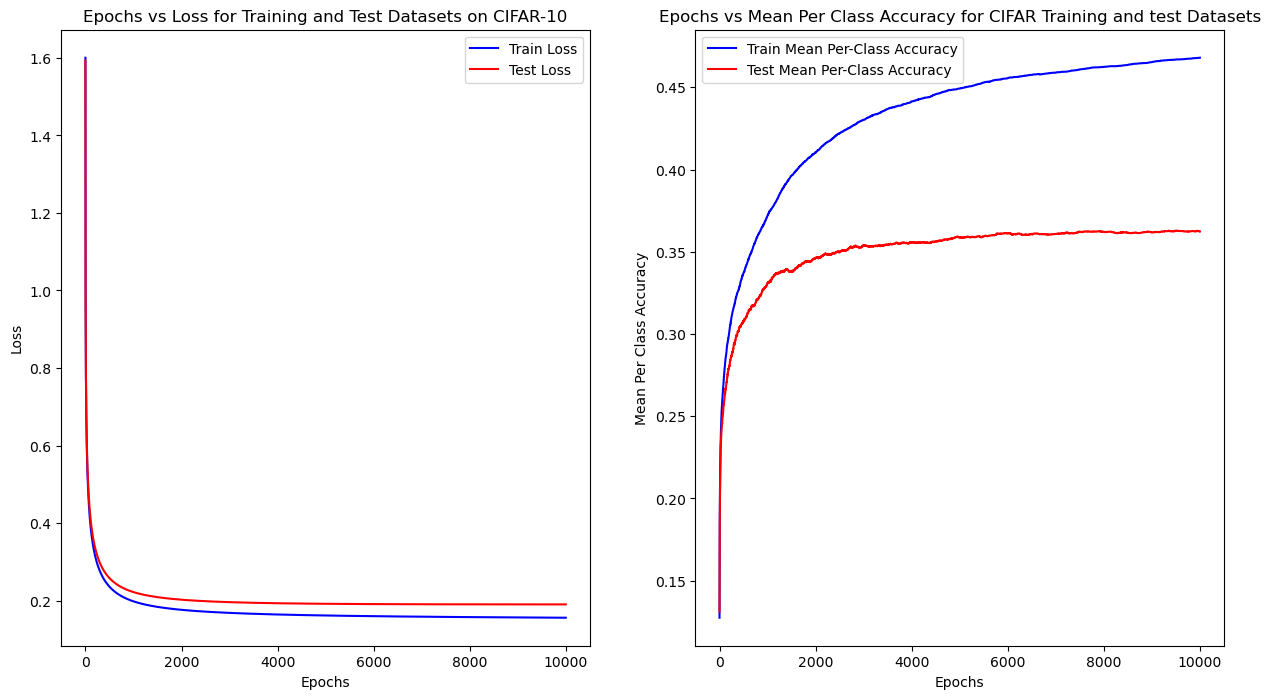

In [84]:
epochs = [i for i in range(10000)]

fig = plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_cifar, color='b', label='Train Loss')
plt.plot(epochs, loss_test_cifar, color='r', label='Test Loss')
plt.title('Epochs vs Loss for Training and Test Datasets on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, per_class_accs_cifar, color='b', label='Train Mean Per-Class Accuracy')
plt.plot(epochs, per_class_accs_test_cifar, color='r', label='Test Mean Per-Class Accuracy')
plt.title('Epochs vs Mean Per Class Accuracy for CIFAR Training and test Datasets')
plt.xlabel('Epochs')
plt.ylabel('Mean Per Class Accuracy')
plt.legend()

fig.savefig('softmax_regression_results_CIFAR-10.png')
plt.show()

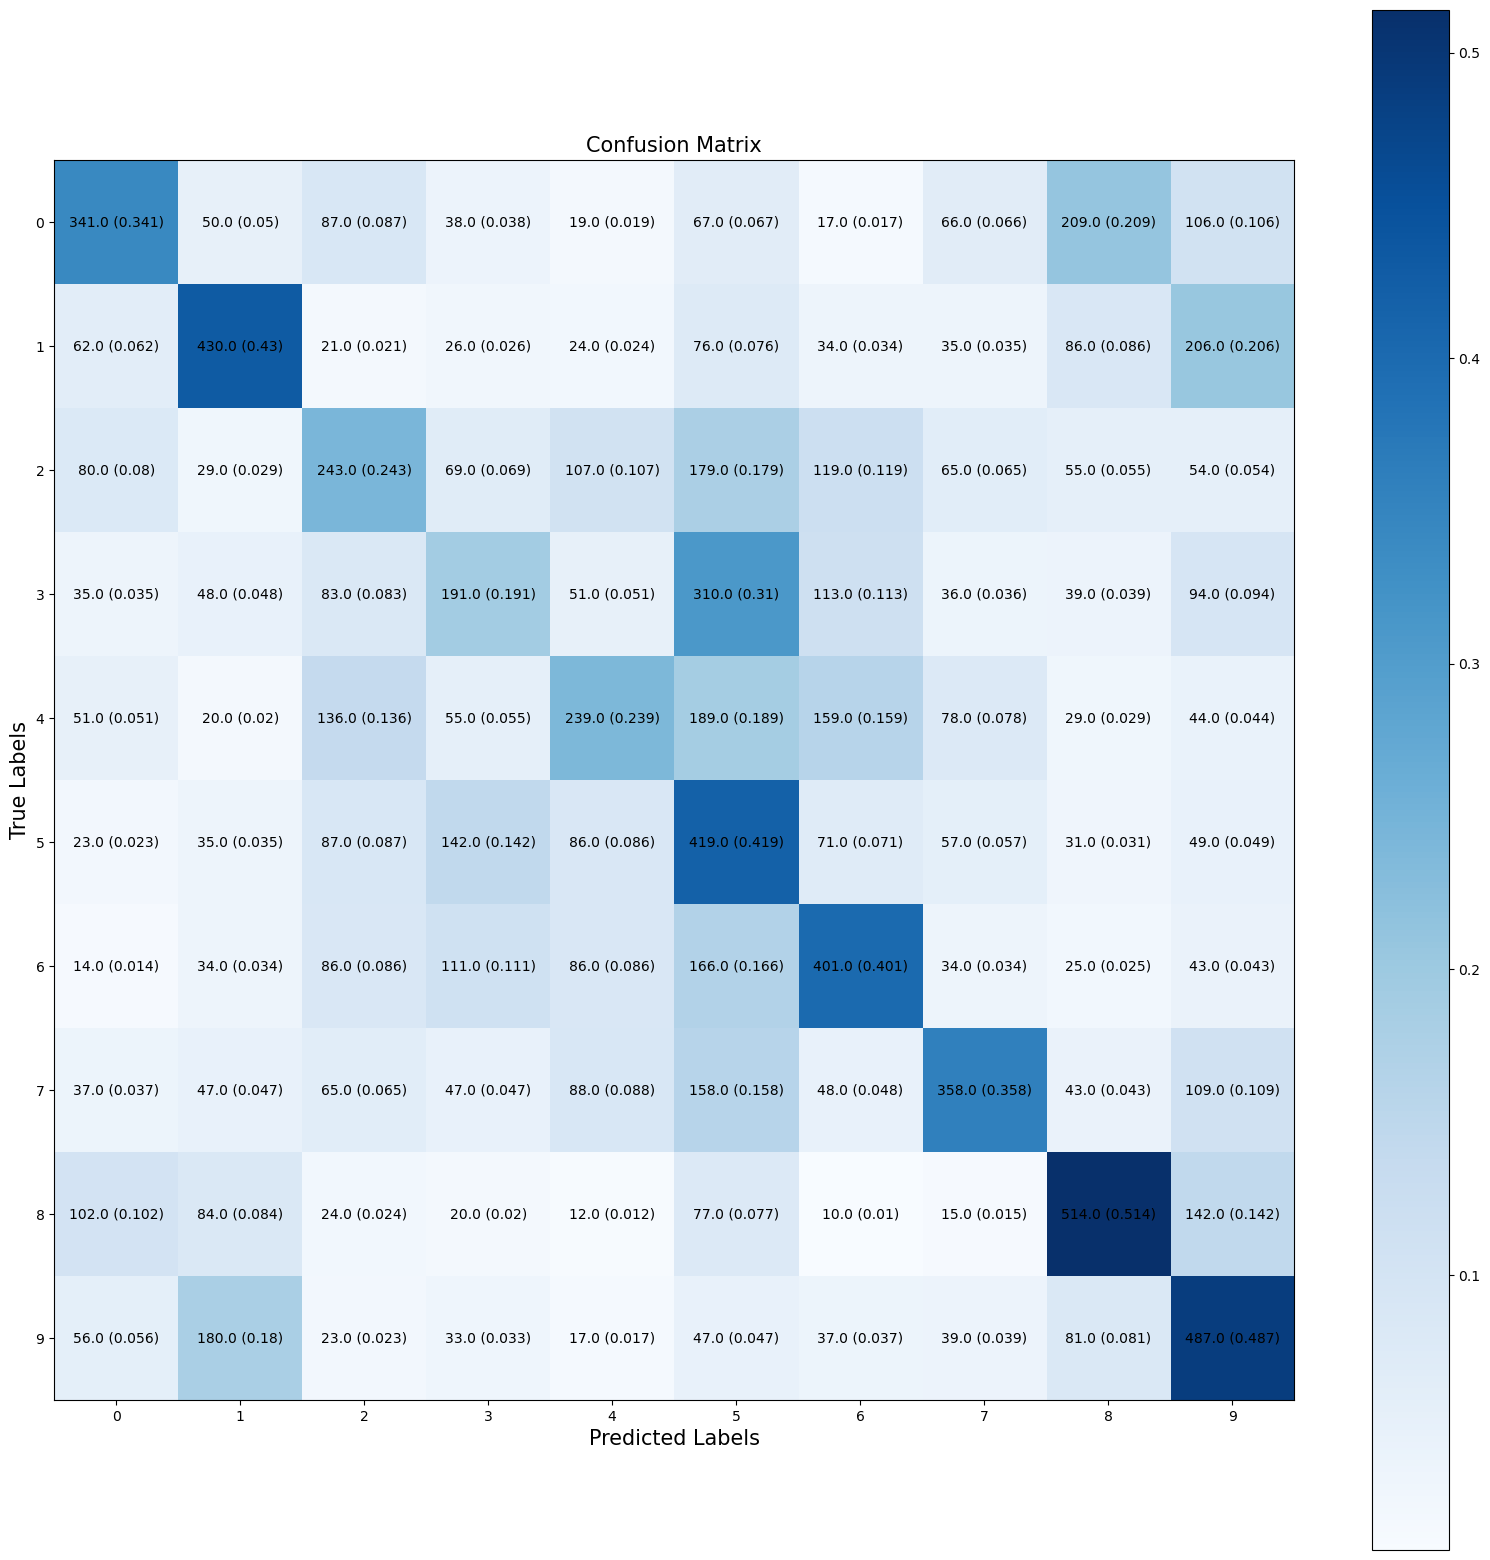

In [85]:
def build_confusion_matrix(W, b, X_test, y_test_labels):
    y_pred = np.argmax(softmax(X_test @ W + b), axis=1) # argmax converts one hot predictions to probabilities
    # Building a 10x10 confusion matrix
    # Needs original test labels instead of ohe labels
    confusion_matrix = np.zeros((10,10))
    for idx in range(y_test_labels.shape[0]):
        confusion_matrix[y_test_labels[idx], y_pred[idx]] += 1
    
    return confusion_matrix, confusion_matrix/confusion_matrix.sum(axis=1)[:, np.newaxis]

confusion_matrix, norm_confusion_matrix = build_confusion_matrix(W_cifar, b_cifar, norm_test_images, test_labels)
categorical_labels = np.arange(10)

fig = plt.figure(figsize=(20,20))
plt.title('Confusion Matrix', size=15)
plt.xticks(categorical_labels)
plt.yticks(categorical_labels)
plt.xlabel('Predicted Labels', size=15)
plt.ylabel('True Labels', size=15)
im = plt.imshow(norm_confusion_matrix, cmap='Blues')
cbar = plt.colorbar(im)

for i in range(10):
    for j in range(10):
        plt.text(i, j, f'{confusion_matrix[j,i]} ({norm_confusion_matrix[j,i]})', ha='center', va='center', color='black')
fig.savefig('cifar_10_confusion_matrix.png')